<a href="https://colab.research.google.com/github/dho619/TCC_Pos_IA/blob/main/Algoritmo_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [200]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo TratamentoDosDados.ipynb
def TratarDadosBaseWalmart(df):
  df.Date=pd.to_datetime(df.Date, format='%d-%m-%Y')
  df['Day'] = df.Date.dt.day
  df['Month'] = df.Date.dt.month
  df['Year'] = df.Date.dt.year
  df.drop(['Date'], axis=1, inplace=True)

  df.drop_duplicates(inplace=True)

  ignoreFeatures = ['Weekly_Sales', 'Day']
  maximumToBeCategorical = 45
  features = [i for i in df.columns if i not in ignoreFeatures]
  uniqueValuesForFeature = df[features].nunique().sort_values()
  categoricalFeature = [];
  valuesFeature = [];
  for i in range(df[features].shape[1]):
      if uniqueValuesForFeature.values[i]<=maximumToBeCategorical:
          categoricalFeature.append(uniqueValuesForFeature.index[i])
      else:
          valuesFeature.append(uniqueValuesForFeature.index[i])
  for i in categoricalFeature:
    if df[i].nunique()==2:
        df[i]=pd.get_dummies(df[i], drop_first=True, prefix=str(i))
    if (df[i].nunique()>2):
        df = pd.concat([df.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df[i], prefix=str(i)))],axis=1)
    
  return df


In [244]:
#Para documentação de passo a passo e justificativa dessa função, pode encontrá-la no arquivo PreparaçãoDeDados.ipynb

def NormalizeValues(df, columns):
  for column in columns:
    df[column] = df[column]/df[column].max()

def PreparaDados(df):
  target = "Weekly_Sales"

  df["SalesOneWeekAgo"] = df[target].copy(deep=True)
  df["SalesTwoWeeksAgo"] = df[target].copy(deep=True)
  df["SalesThreeWeeksAgo"] = df[target].copy(deep=True)

  for i, sales in enumerate(df[target]):
    df["SalesOneWeekAgo"][i] = df[target][i-1] if (i-1)>0 else df[target][i]
    df["SalesTwoWeeksAgo"][i] = df[target][i-2] if (i-2)>0 else df[target][i]
    df["SalesThreeWeeksAgo"][i] = df[target][i-3] if (i-3)>0 else df[target][i]

  #Normalizando valores
  columns = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
  NormalizeValues(df, columns)

  filtro_treino = df["Year_2012"] == 0
  filtro_teste = df["Year_2012"] == 1

  train = df.where(filtro_treino).dropna()
  test =  df.where(filtro_teste).dropna()

  y_train = train[target].array
  X_train = train.drop([target, "Year_2010", "Year_2011", "Year_2012"],axis=1)
  
  y_test = test[target].array
  X_test = test.drop([target, "Year_2010", "Year_2011", "Year_2012"],axis=1)

  X_train.reset_index(drop=True,inplace=True)

  return X_train, X_test, y_train, y_test

In [291]:
df = pd.read_csv('./Walmart.csv')
df = TratarDadosBaseWalmart(df)

X_train, X_test, y_train, y_test = PreparaDados(df)

print('Base original  ---> ',df.shape,df.shape,'\nBase de Treino  ---> ',X_train.shape,y_train.shape,'\nBase de teste   ---> ', X_test.shape,'', y_test.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Base original  --->  (6435, 70) (6435, 70) 
Base de Treino  --->  (4500, 66) (4500,) 
Base de teste   --->  (1935, 66)  (1935,)


In [292]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr.score(X_train, y_train)
predictions = mlr.predict(X_test)

In [293]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), np.sqrt(mean_squared_error(y_test, predictions))

(0.968819954667256, 66459.29533402783, 94737.09243563427)

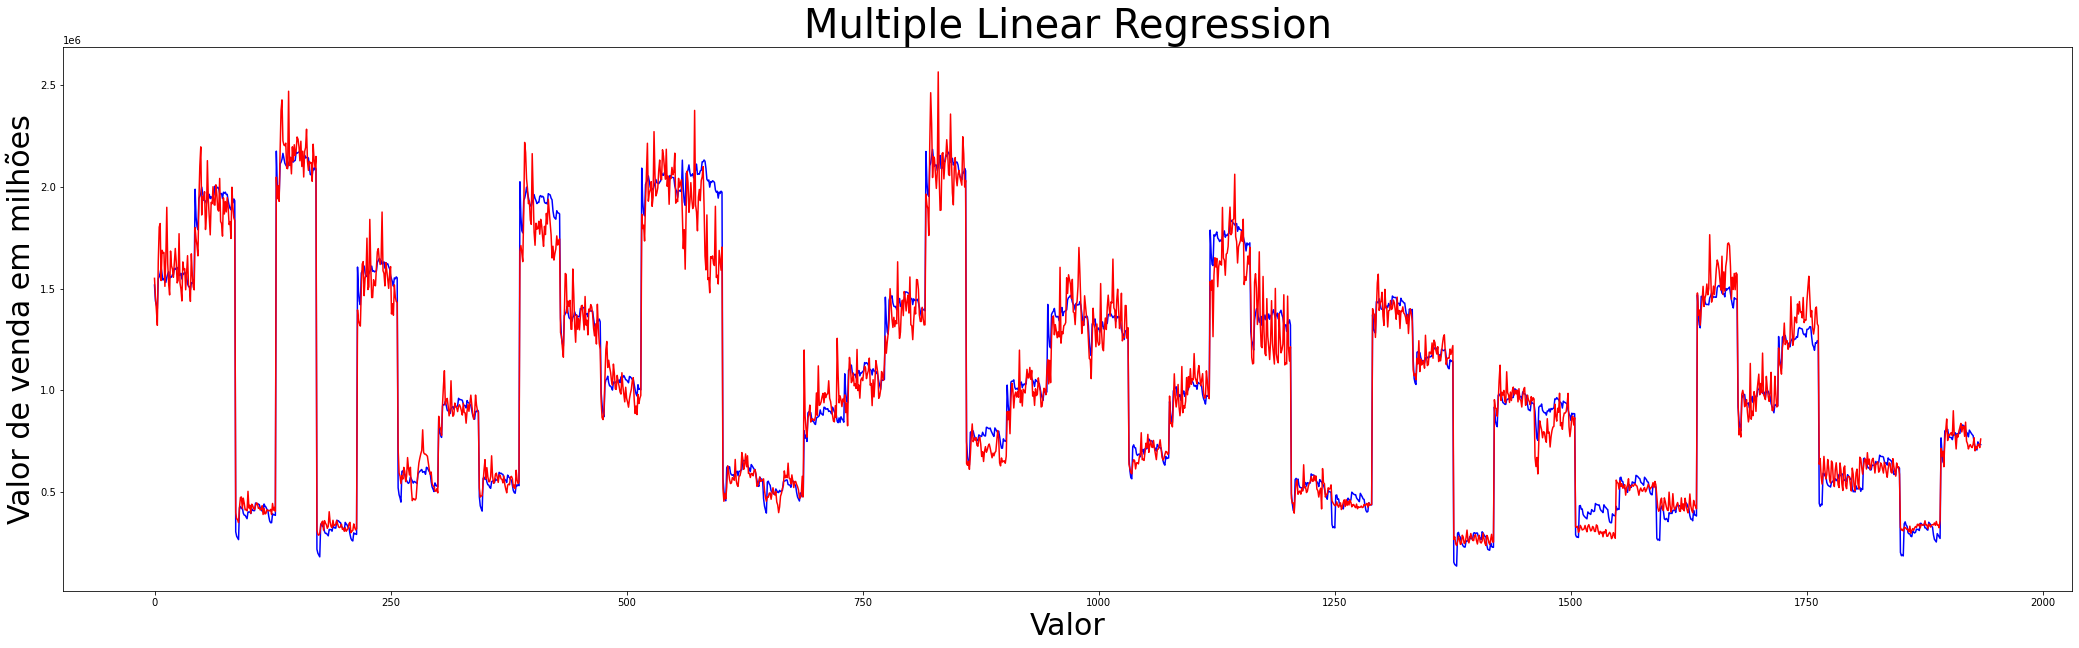

In [305]:
plt.figure(figsize = (36, 10)) 
plt.plot(range(len(predictions)), predictions, 'b')
plt.plot(range(len(predictions)), y_test, 'r')
plt.title("Multiple Linear Regression", fontsize=40)
plt.xlabel("Semanas", fontsize=30)
plt.ylabel("Valor de venda em milhões", fontsize=30)

plt.show()

Resultados Loja 1:
0.10964966275350241 80567.0534446472 107319.55712467237


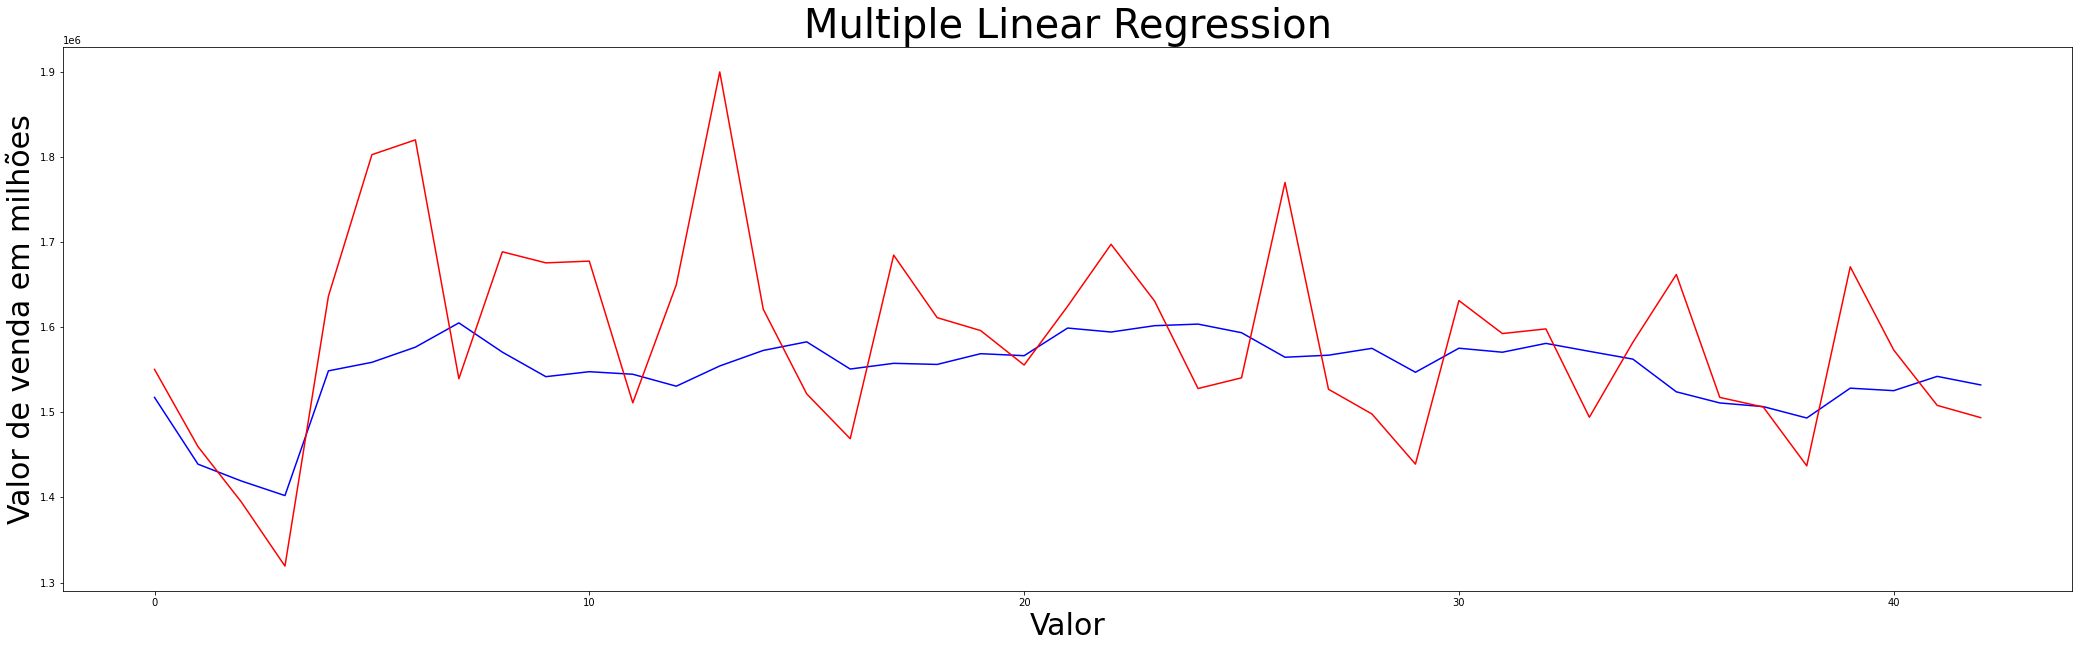

**************************************************
Resultados Loja 2:
0.046008398666536054 87275.4768557697 104840.06518413429


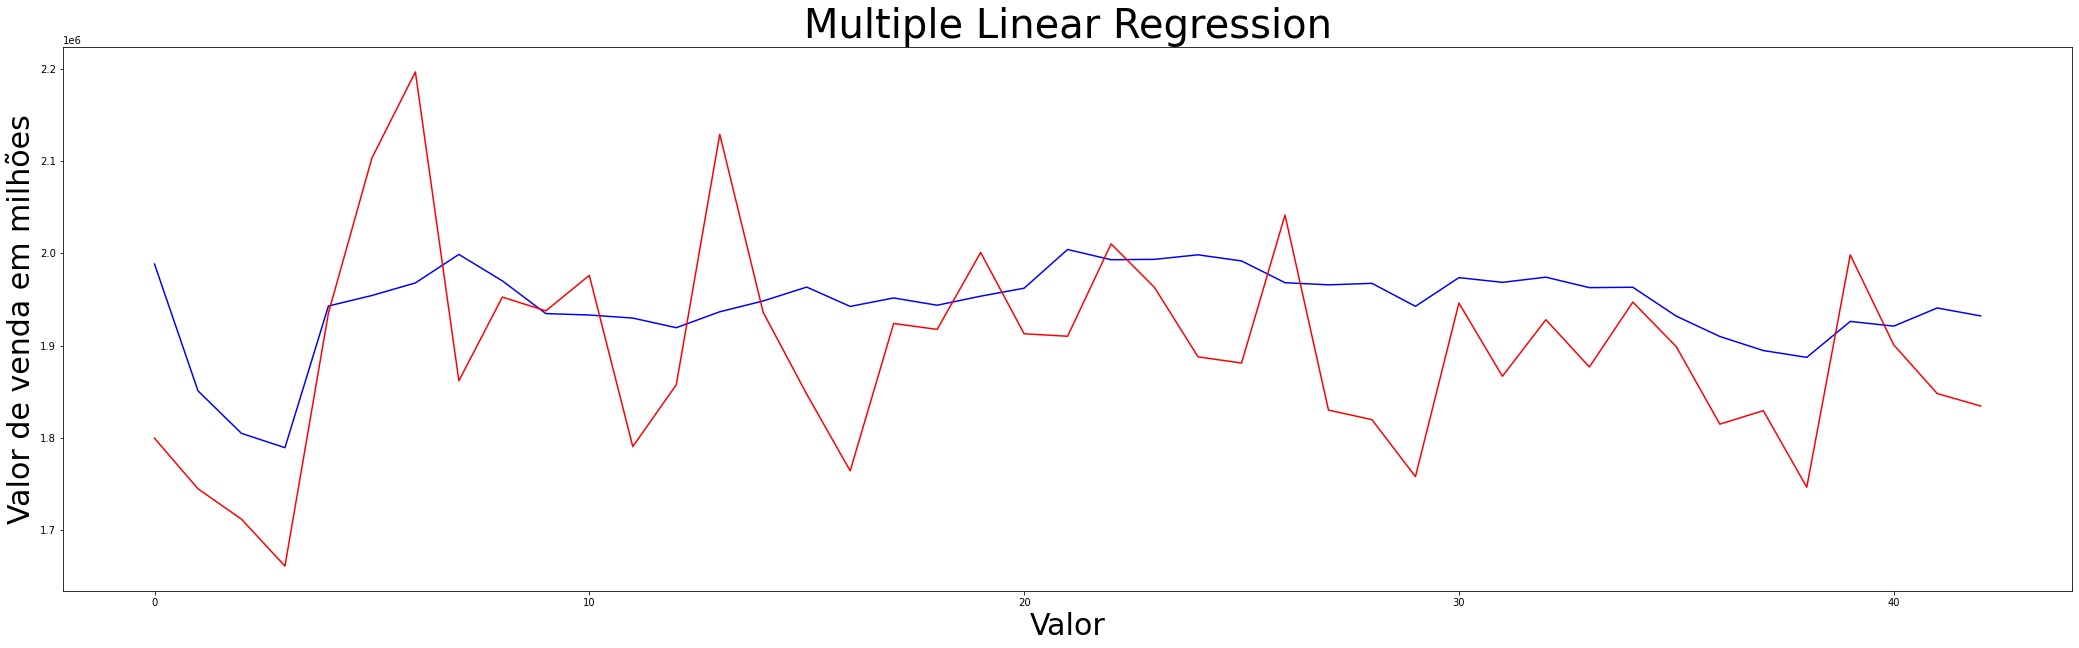

**************************************************
Resultados Loja 3:
-1.3116807812545122 33268.99187703239 43404.31112819364


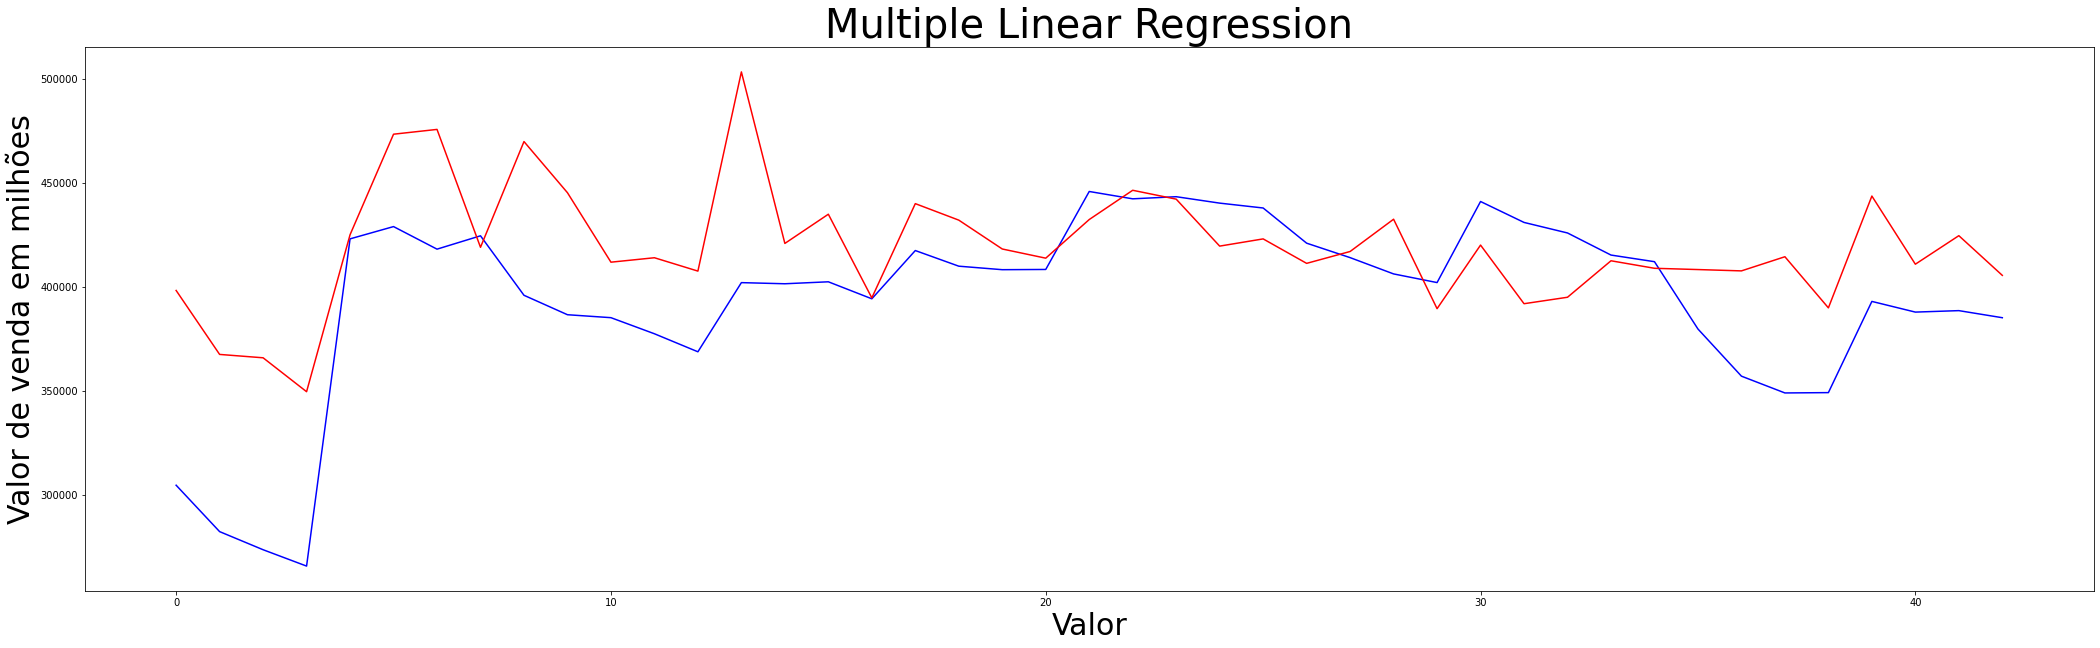

**************************************************
Resultados Loja 4:
0.11239566196180095 68586.41667230349 99449.27106987857


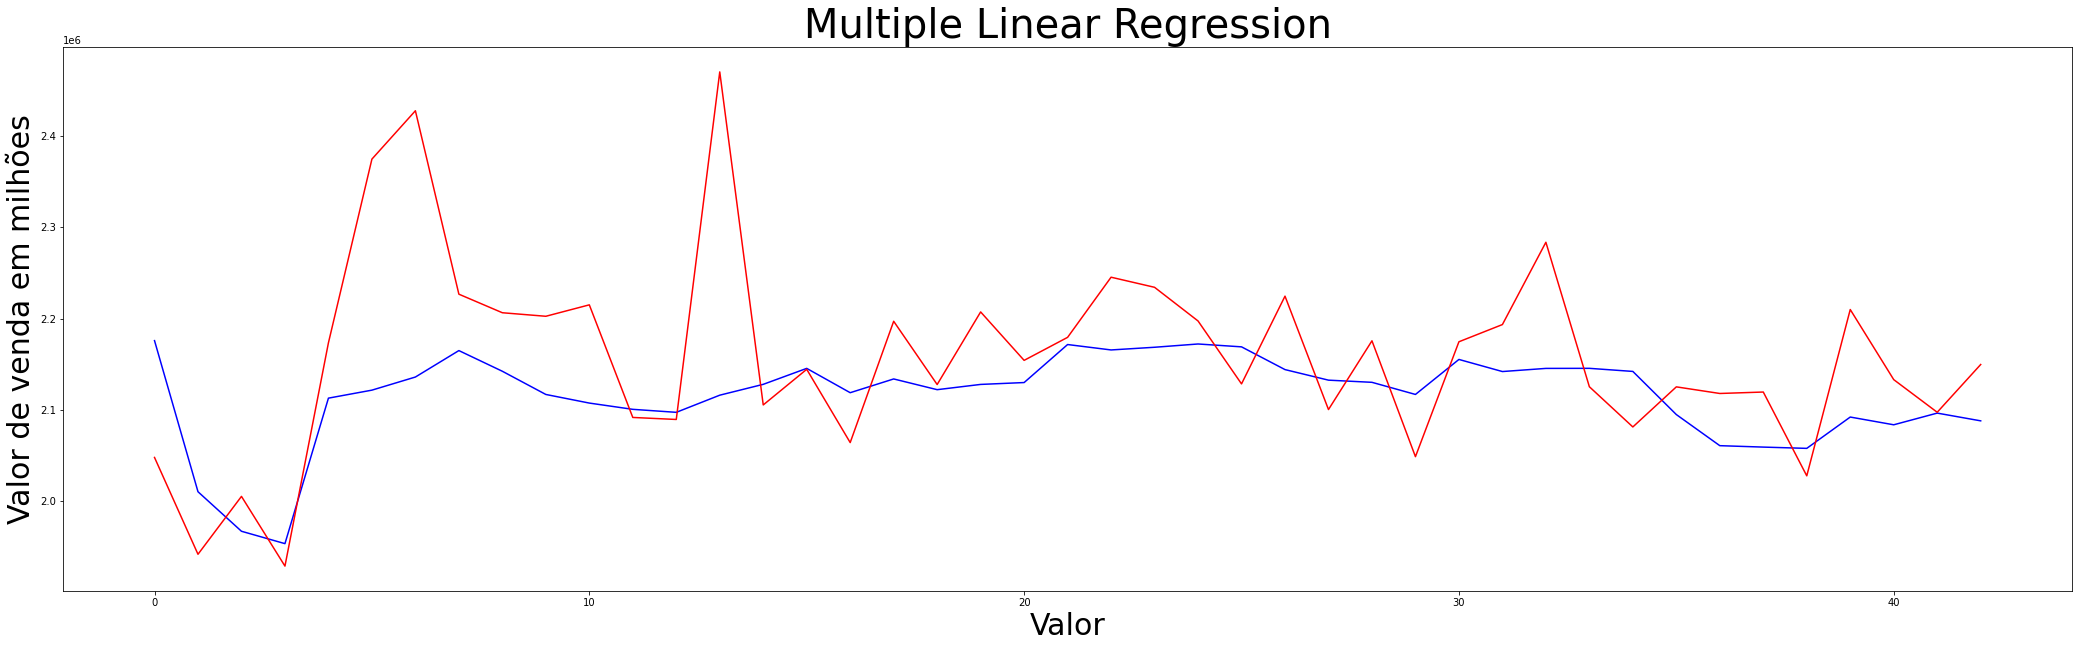

**************************************************
Resultados Loja 5:
-2.964782423477448 33583.071308217215 43375.835428245206


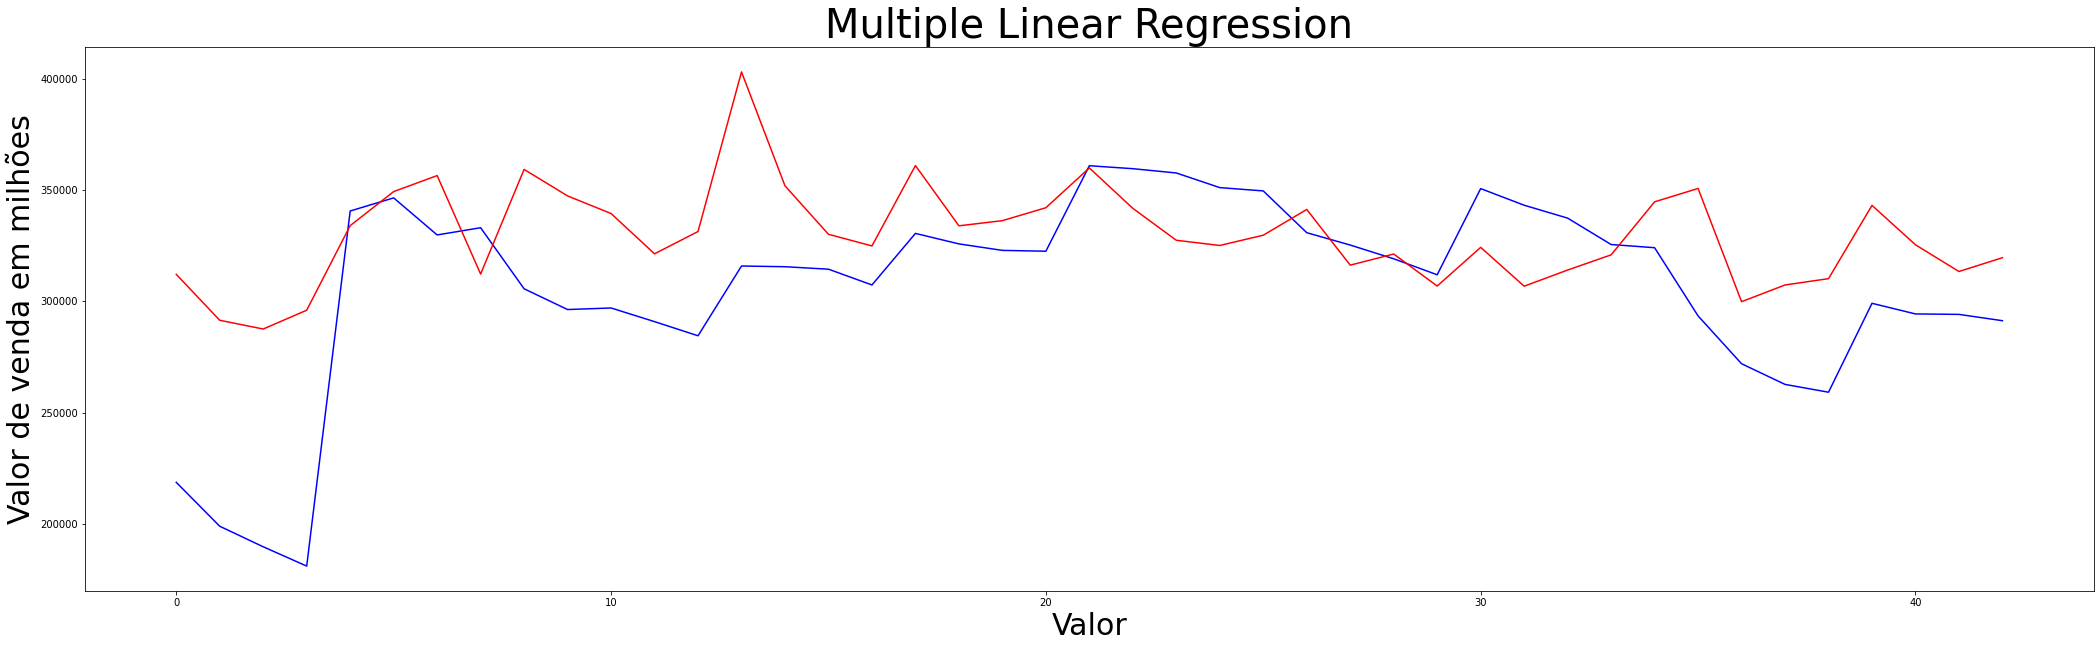

**************************************************
Resultados Loja 6:
0.24585138637404402 85026.00979246284 106502.36705585381


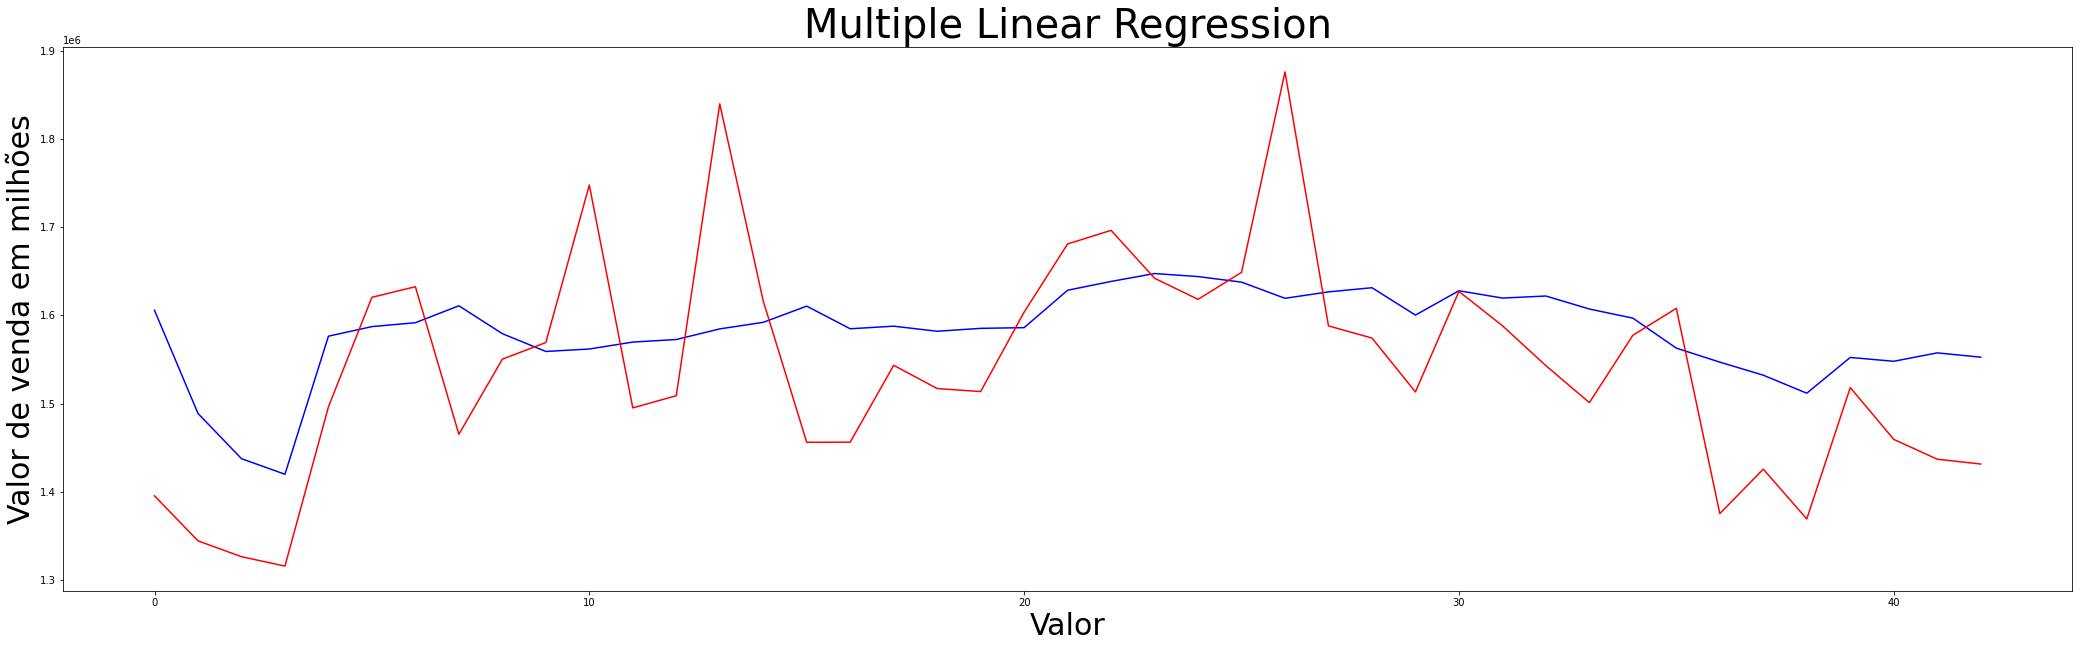

**************************************************
Resultados Loja 7:
0.14484975128711208 59636.9711032037 74958.93400399447


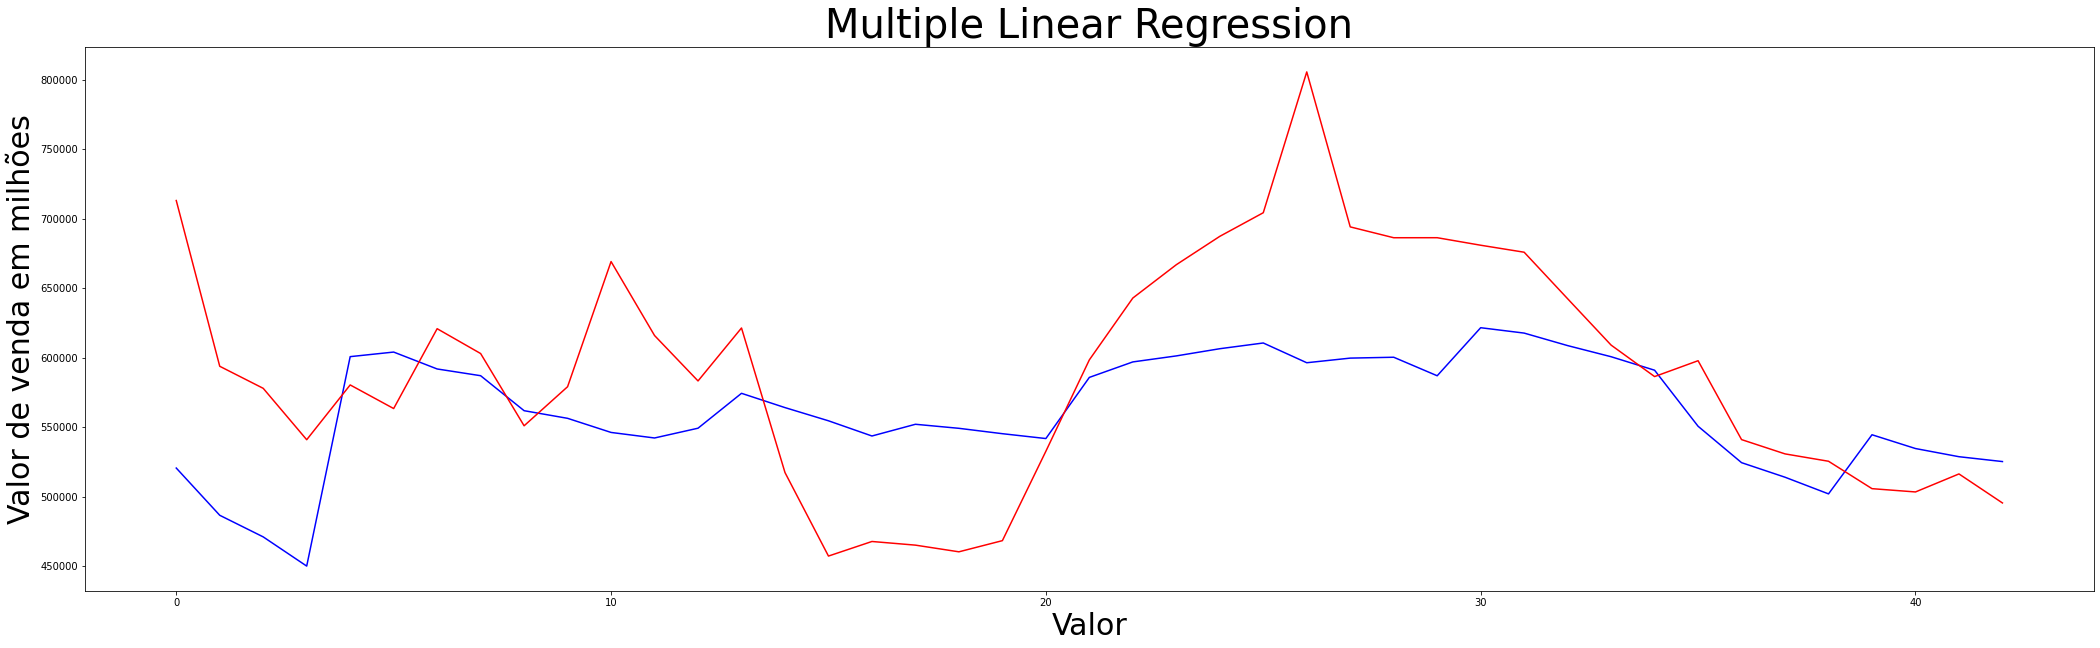

**************************************************
Resultados Loja 8:
0.2411827436613606 34868.91021990305 48952.16771458607


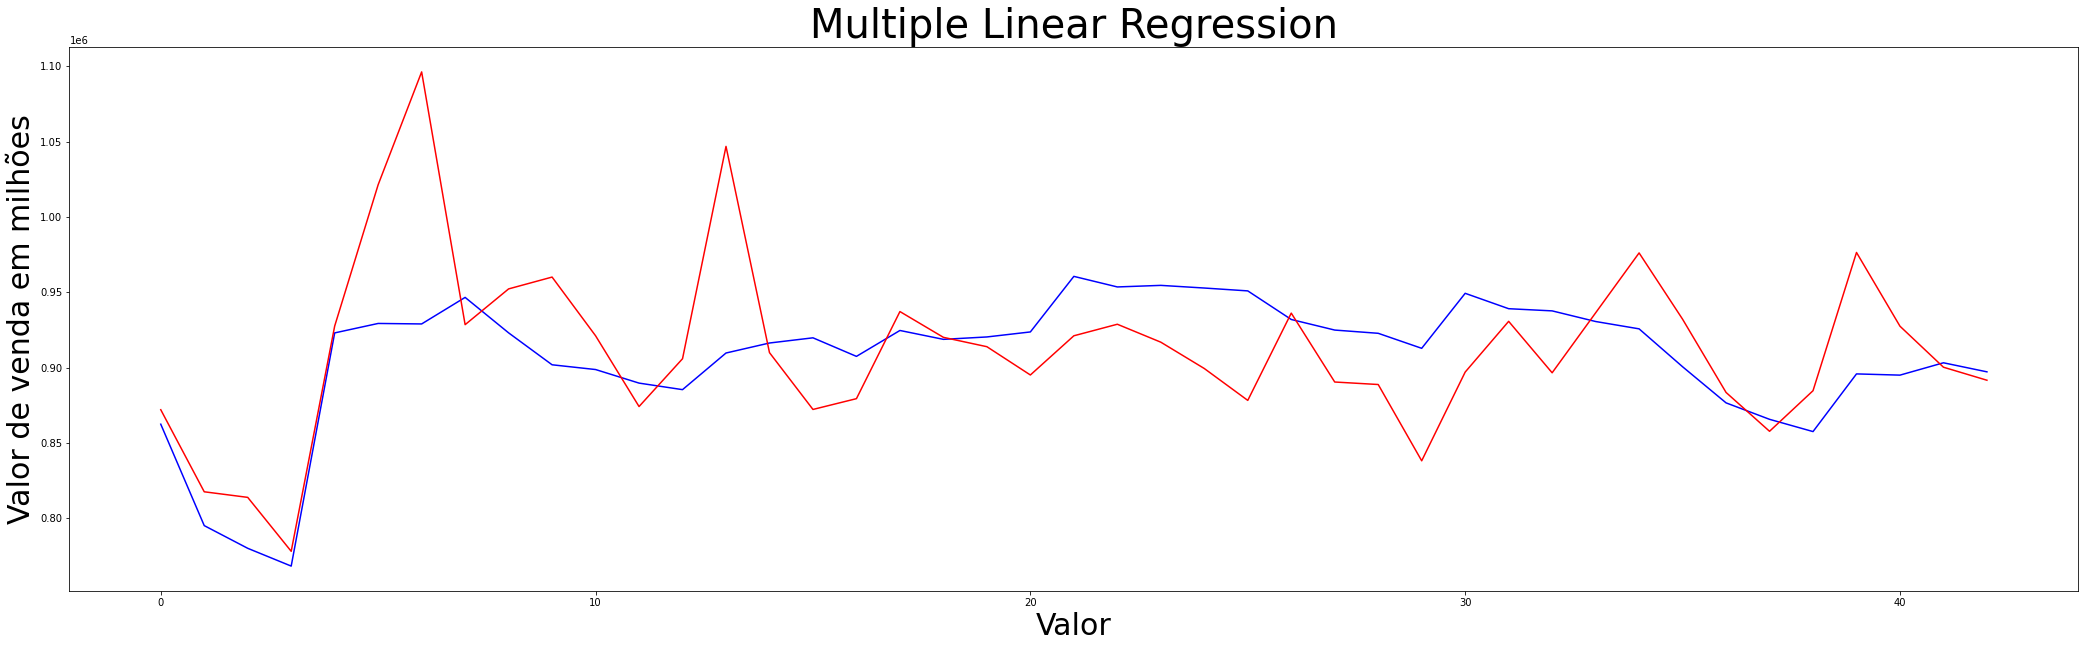

**************************************************
Resultados Loja 9:
-0.0944425886698339 34413.75804474045 42644.56703321775


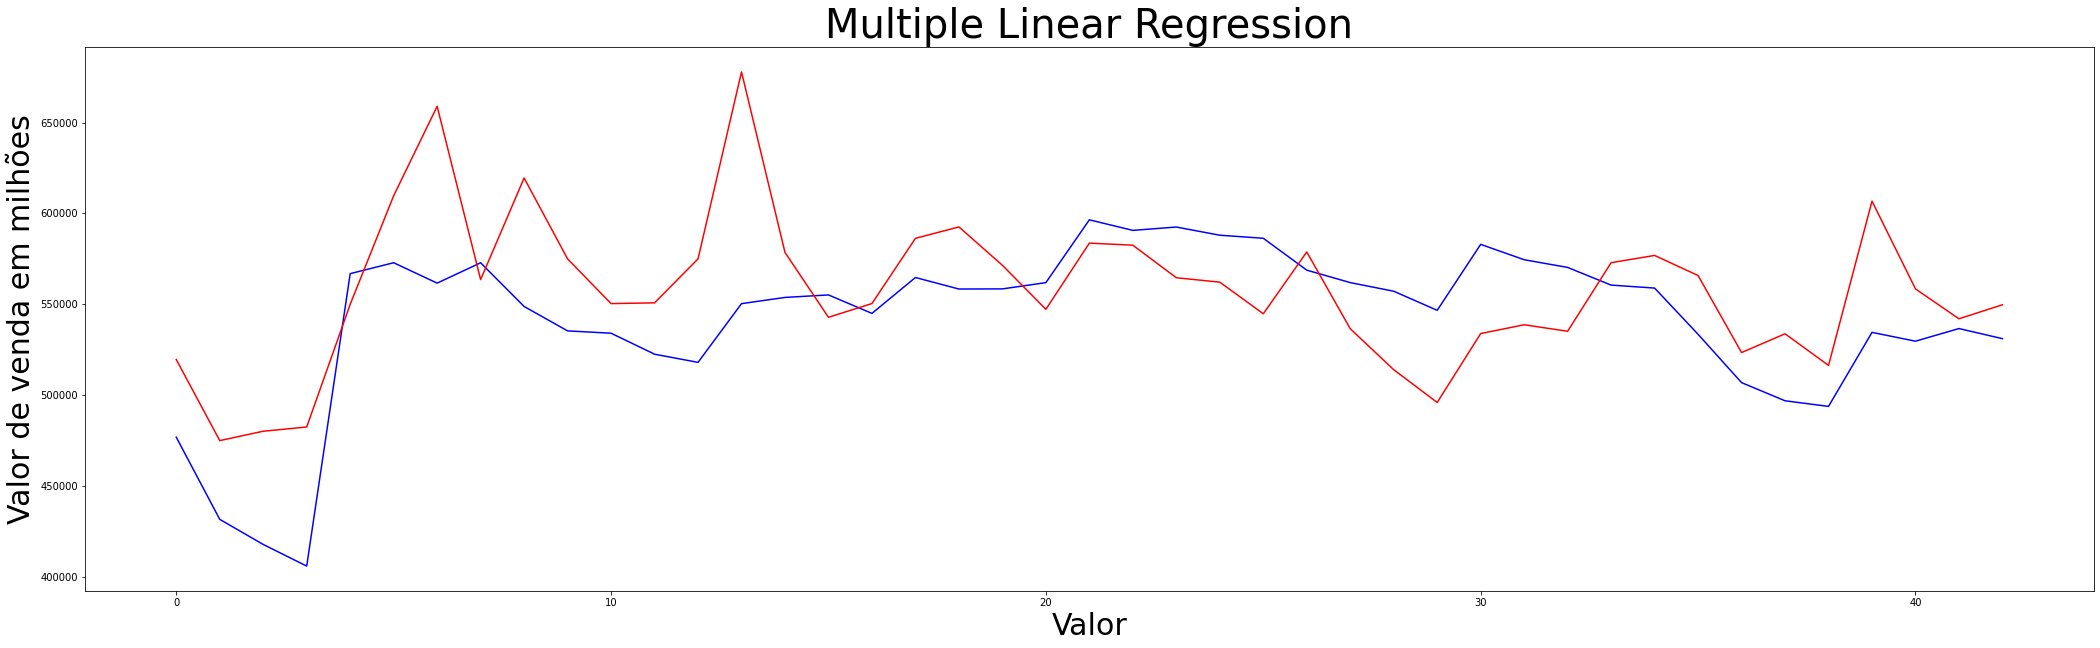

**************************************************
Resultados Loja 10:
-0.3076989476972998 138236.25664035504 157049.72989148984


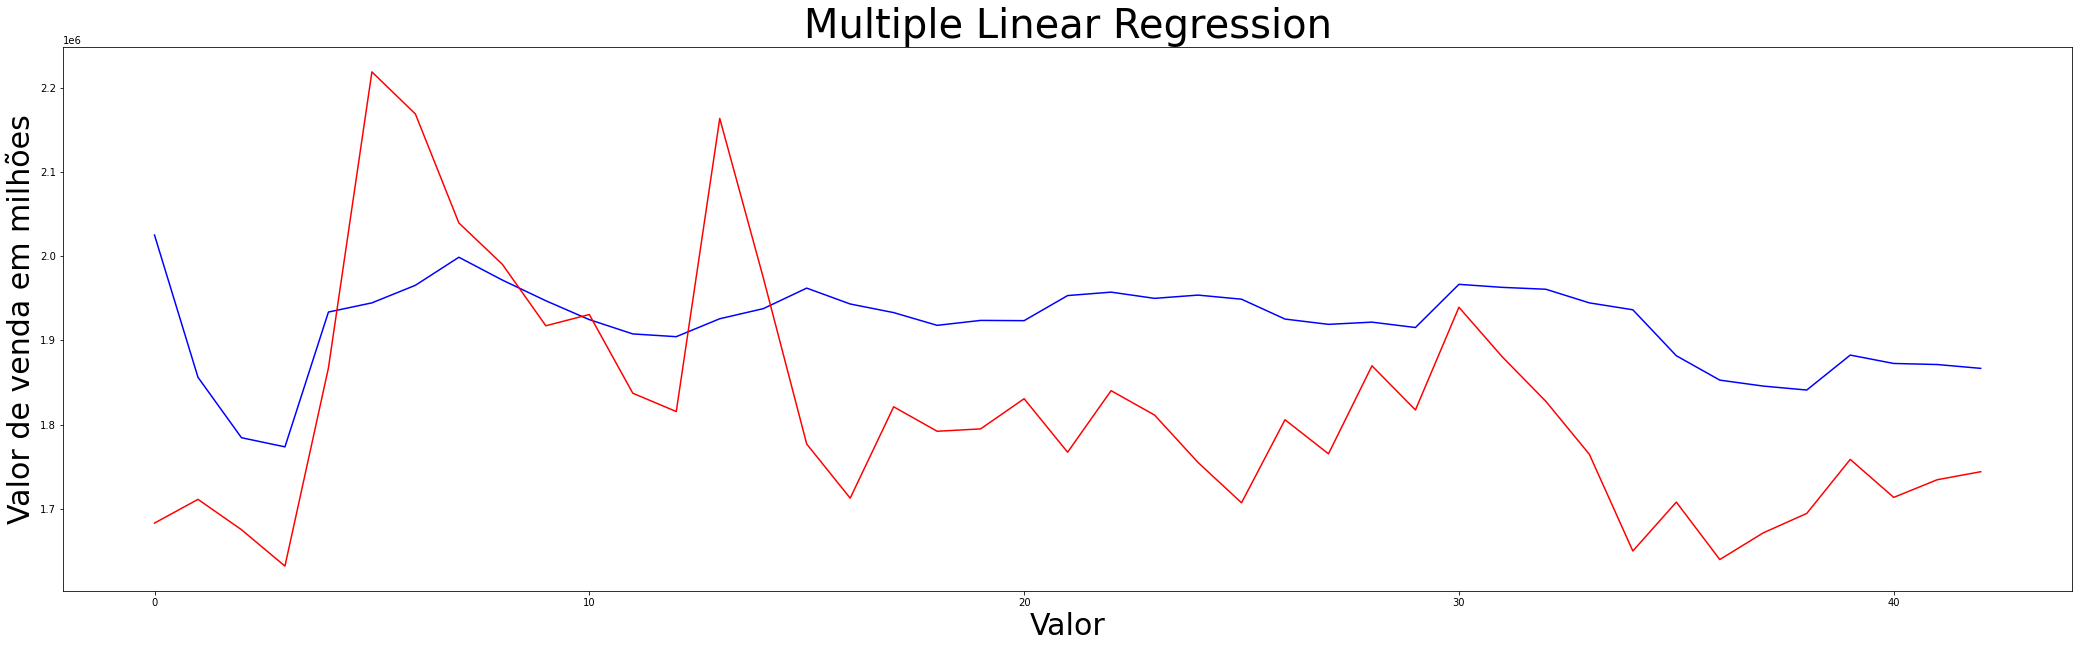

**************************************************
Resultados Loja 11:
0.28377694431217826 61807.910740650164 81525.71170076069


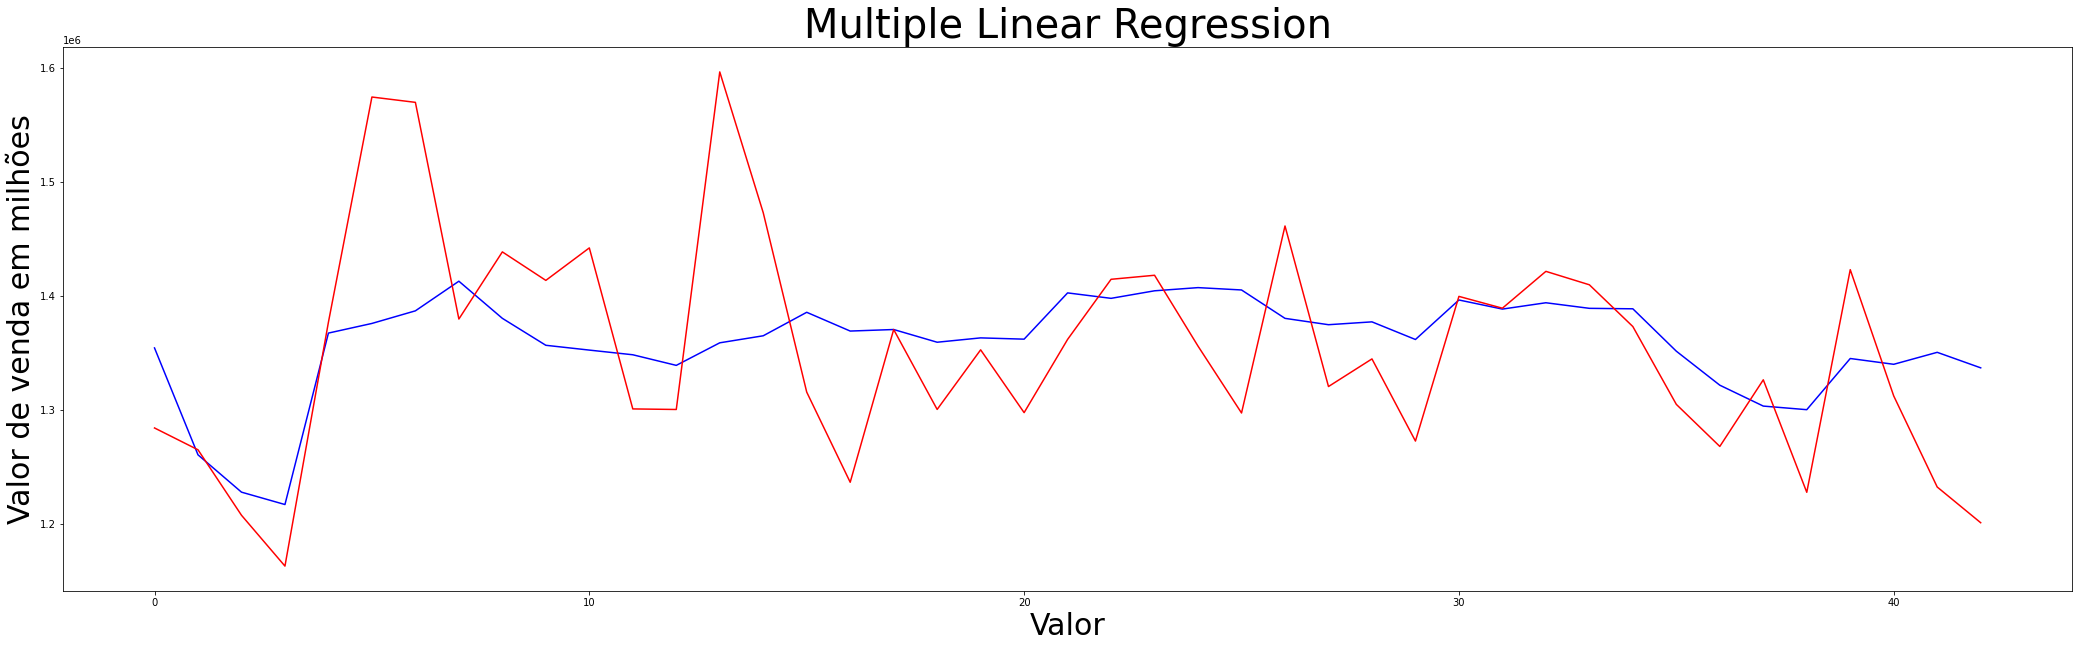

**************************************************
Resultados Loja 12:
0.2486359201177466 62552.54503309183 74260.134837299


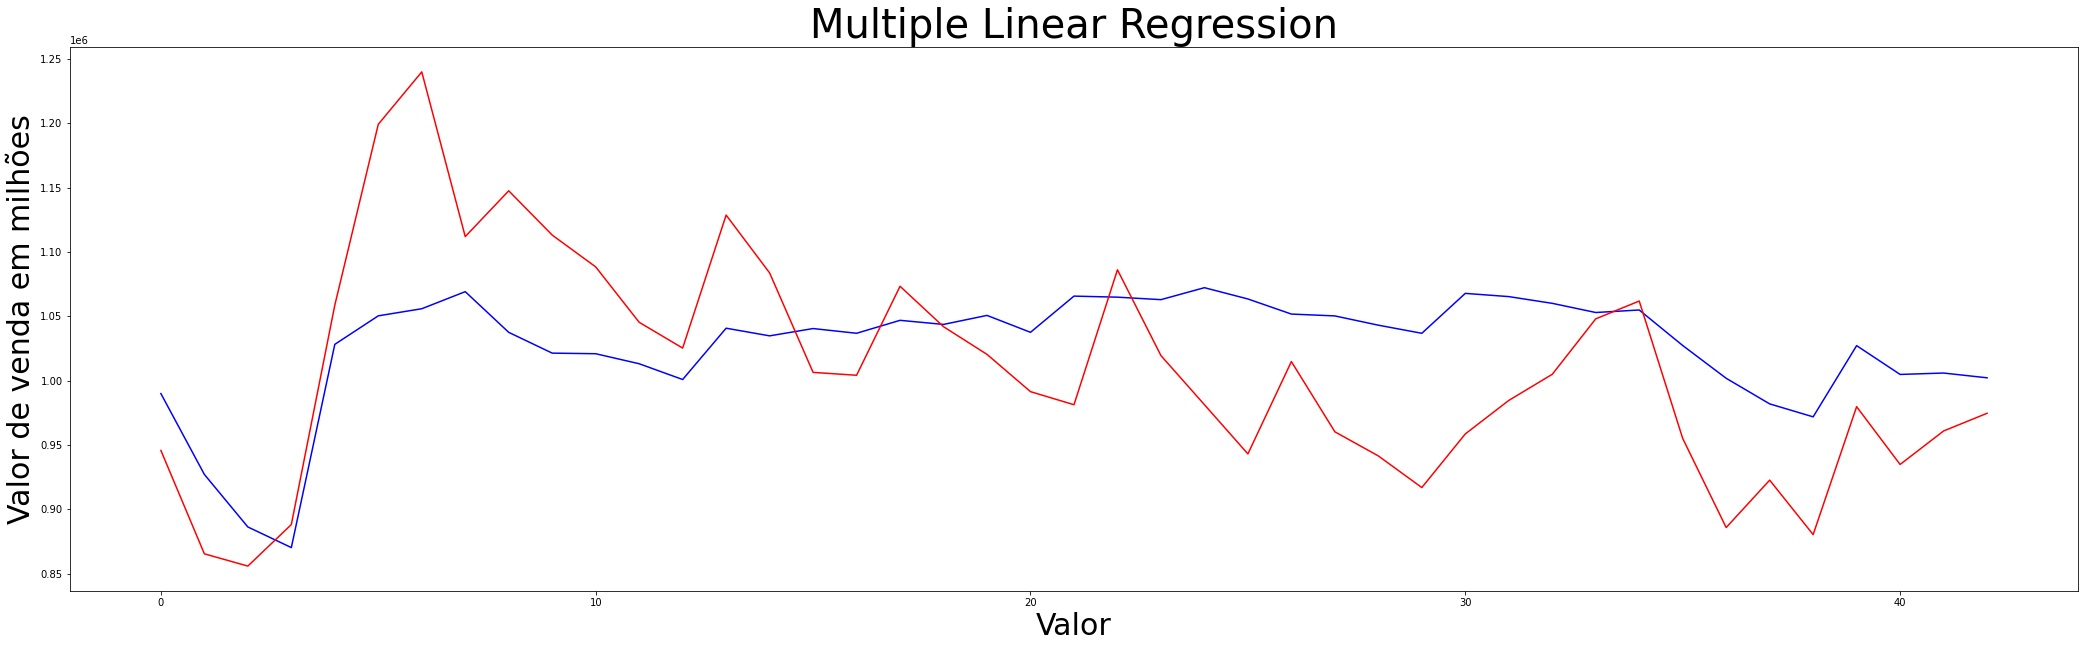

**************************************************
Resultados Loja 13:
0.2961804096413815 70309.52755511795 91842.29327635614


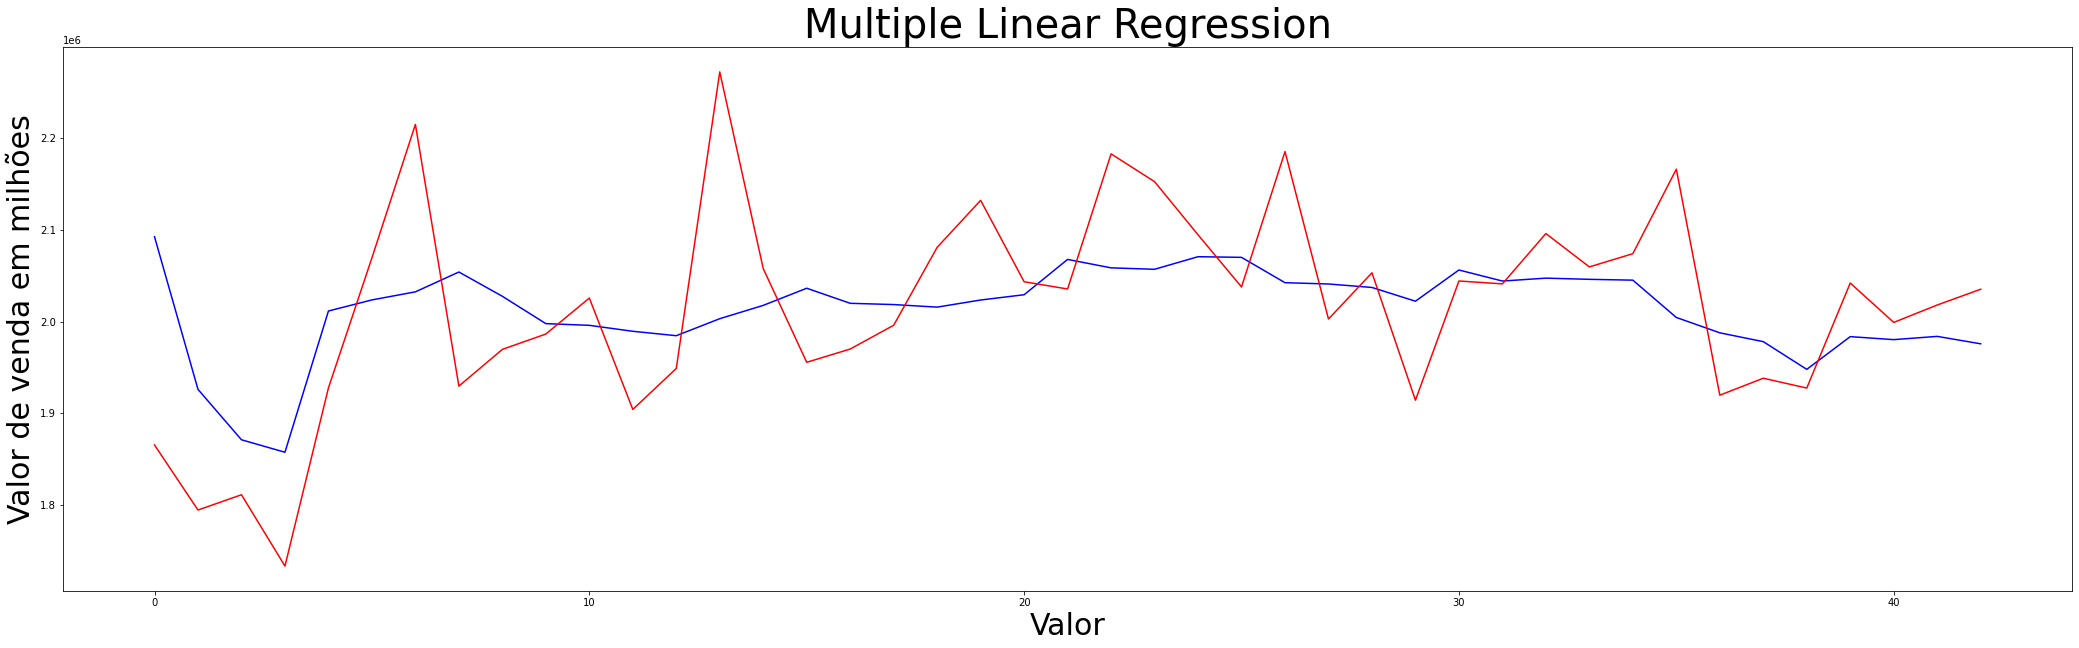

**************************************************
Resultados Loja 14:
-1.2509397004462262 255309.32813931516 294726.77702805196


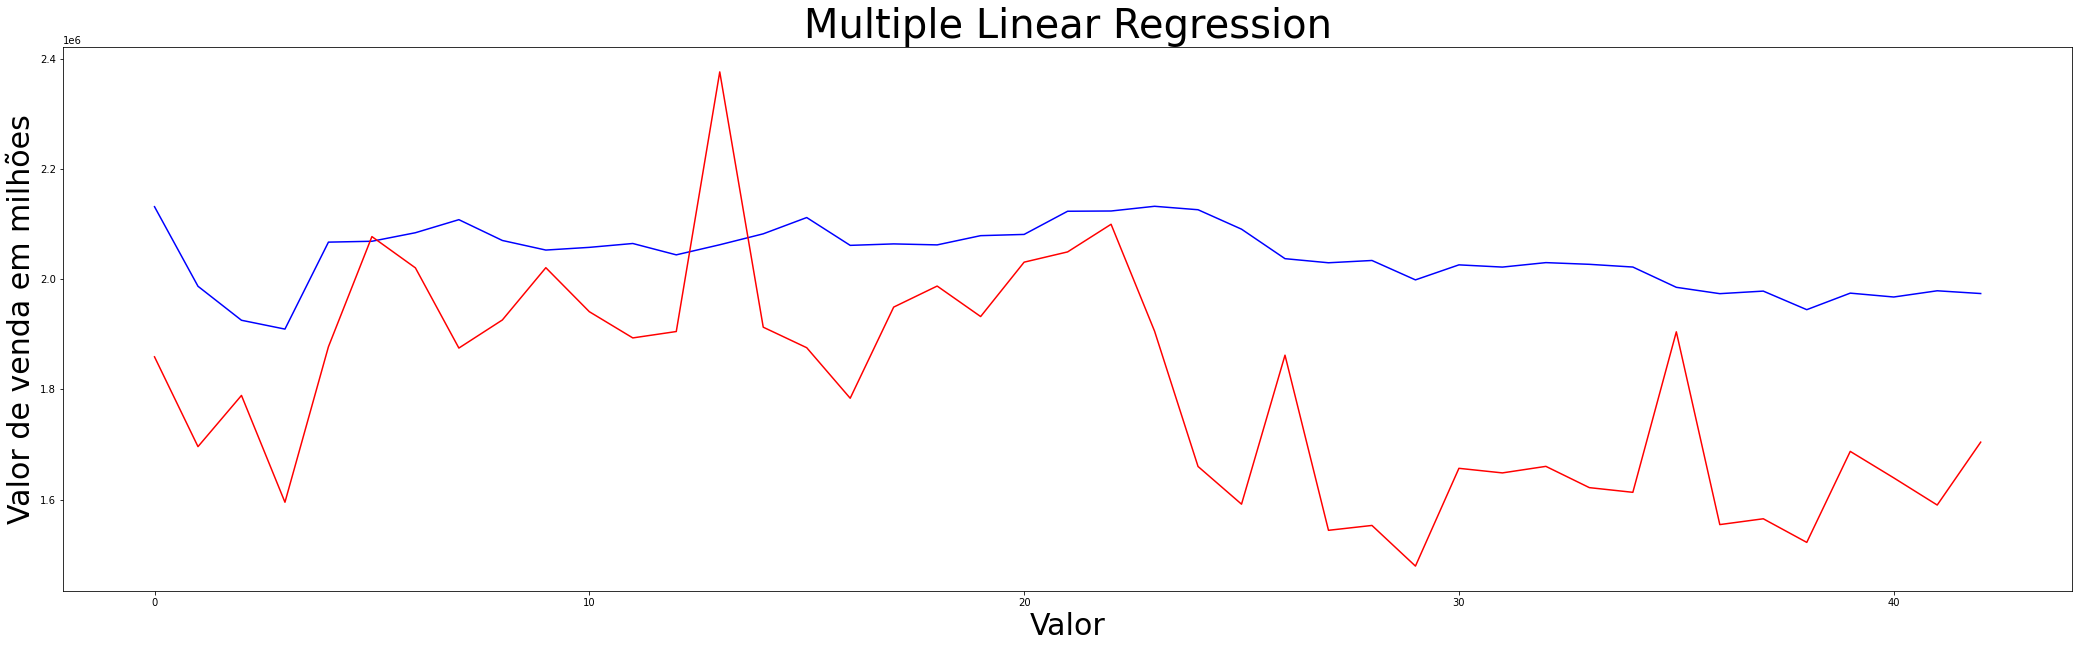

**************************************************
Resultados Loja 15:
0.4846849329588001 30120.756388702637 37758.92790837592


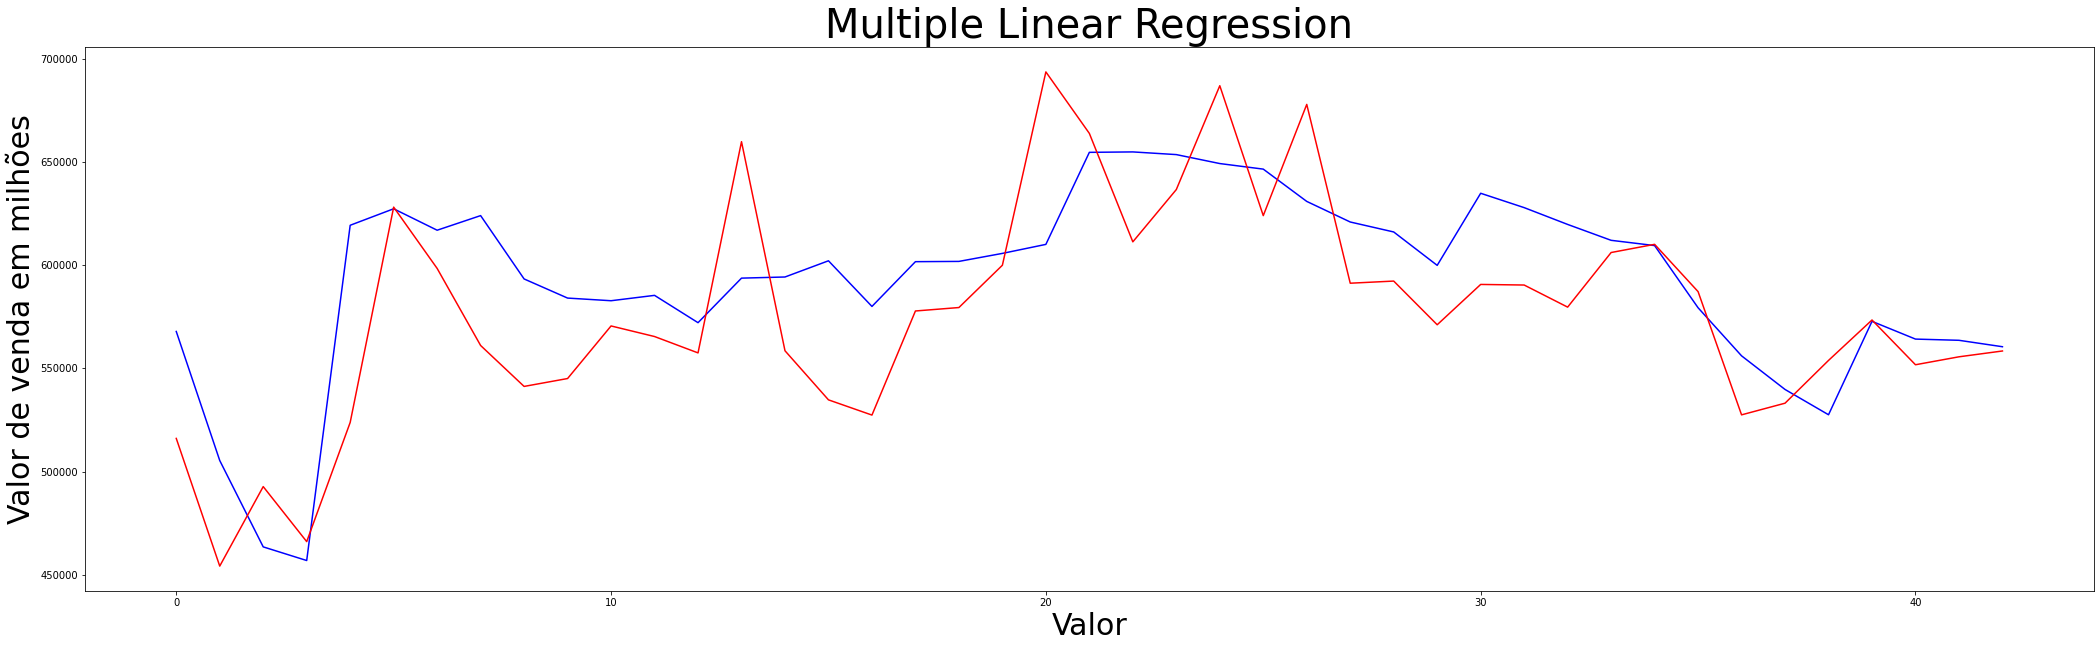

**************************************************
Resultados Loja 16:
0.08862936952367706 38129.46350100164 48301.99192600447


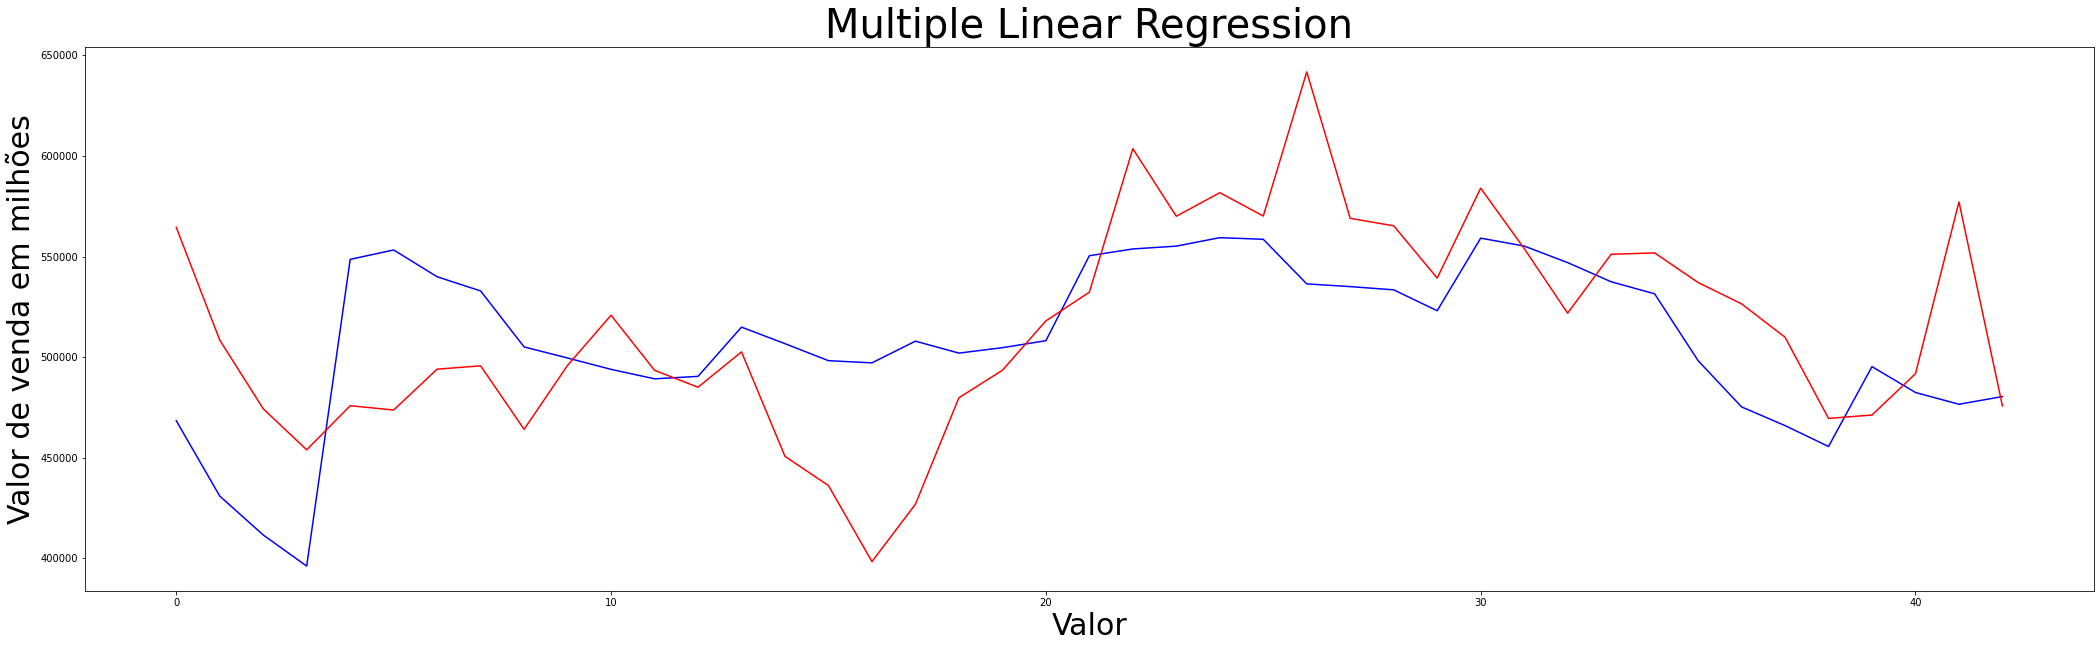

**************************************************
Resultados Loja 17:
-0.6332095670063465 80101.55941890365 119397.84633784405


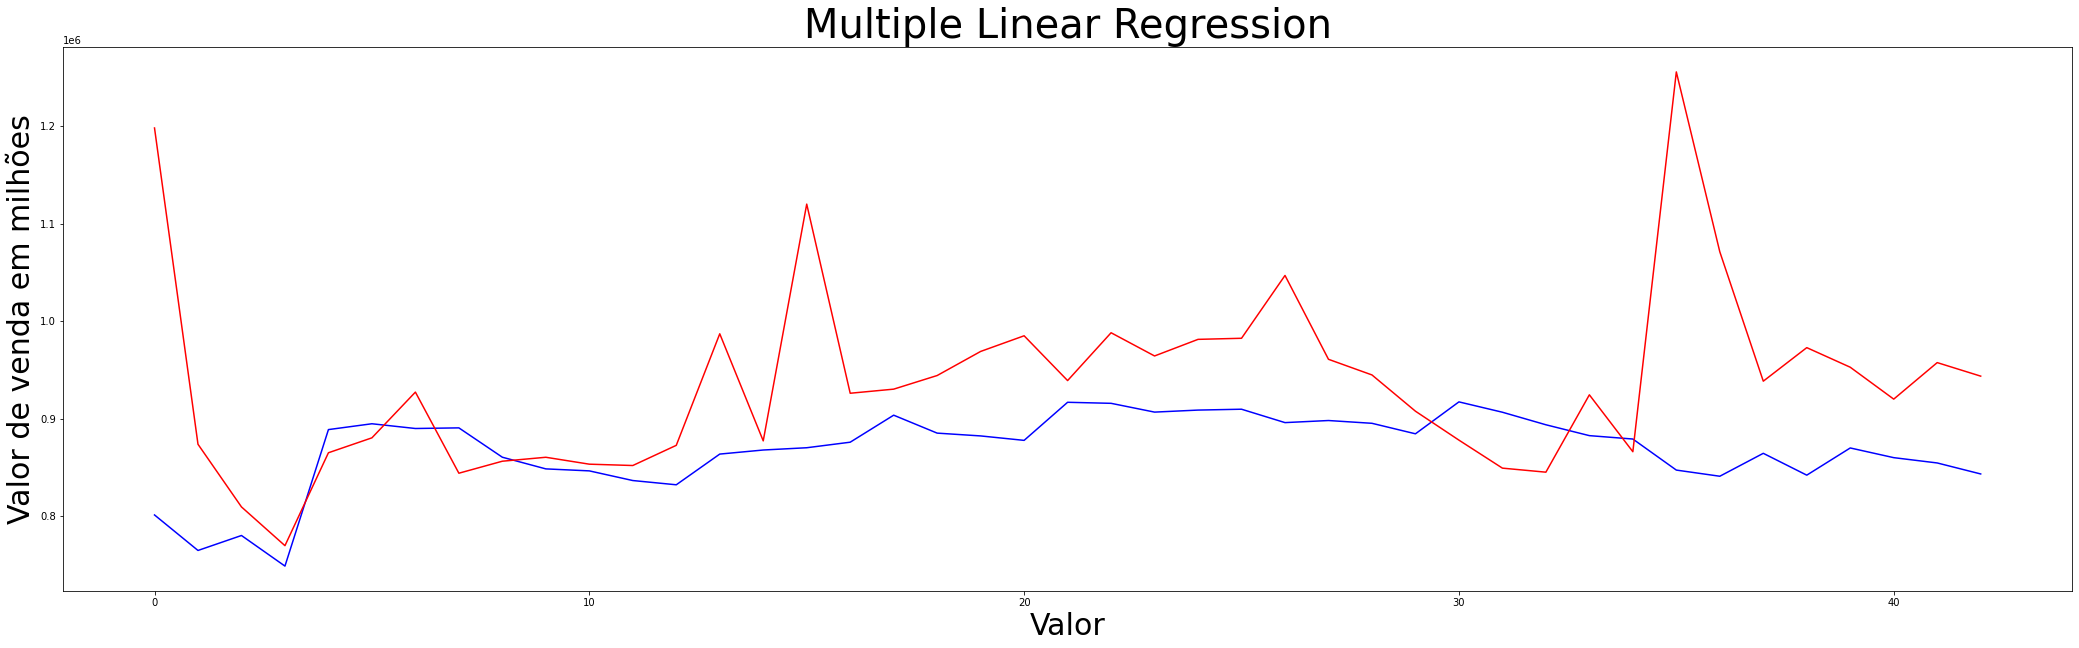

**************************************************
Resultados Loja 18:
0.19775582950285542 55333.41541671185 66271.96467407906


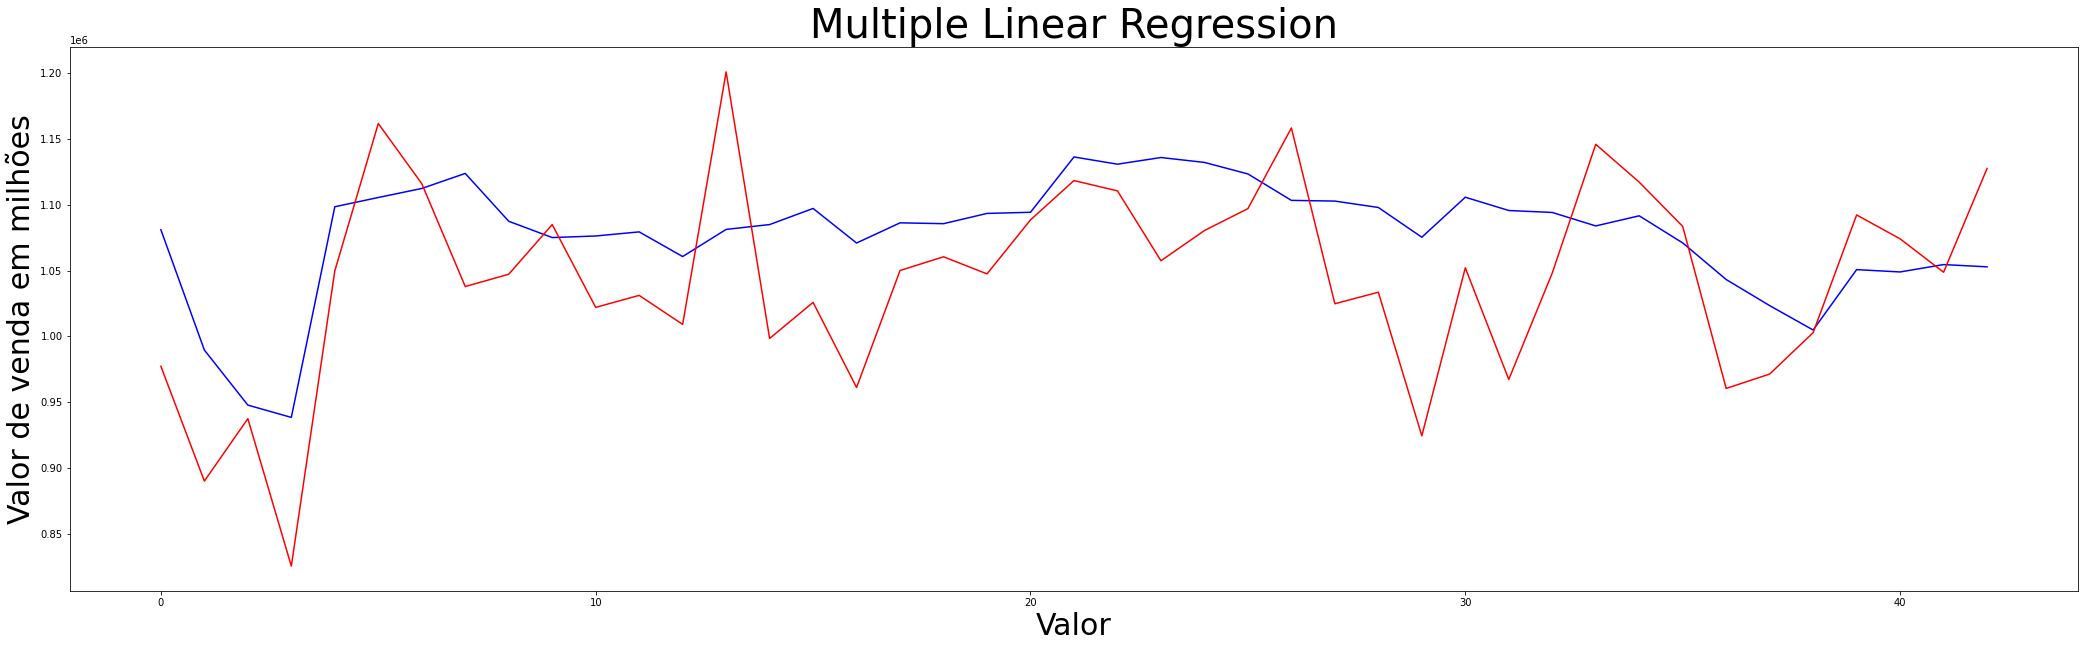

**************************************************
Resultados Loja 19:
-0.051903882381168165 79741.24480565735 95441.27649584545


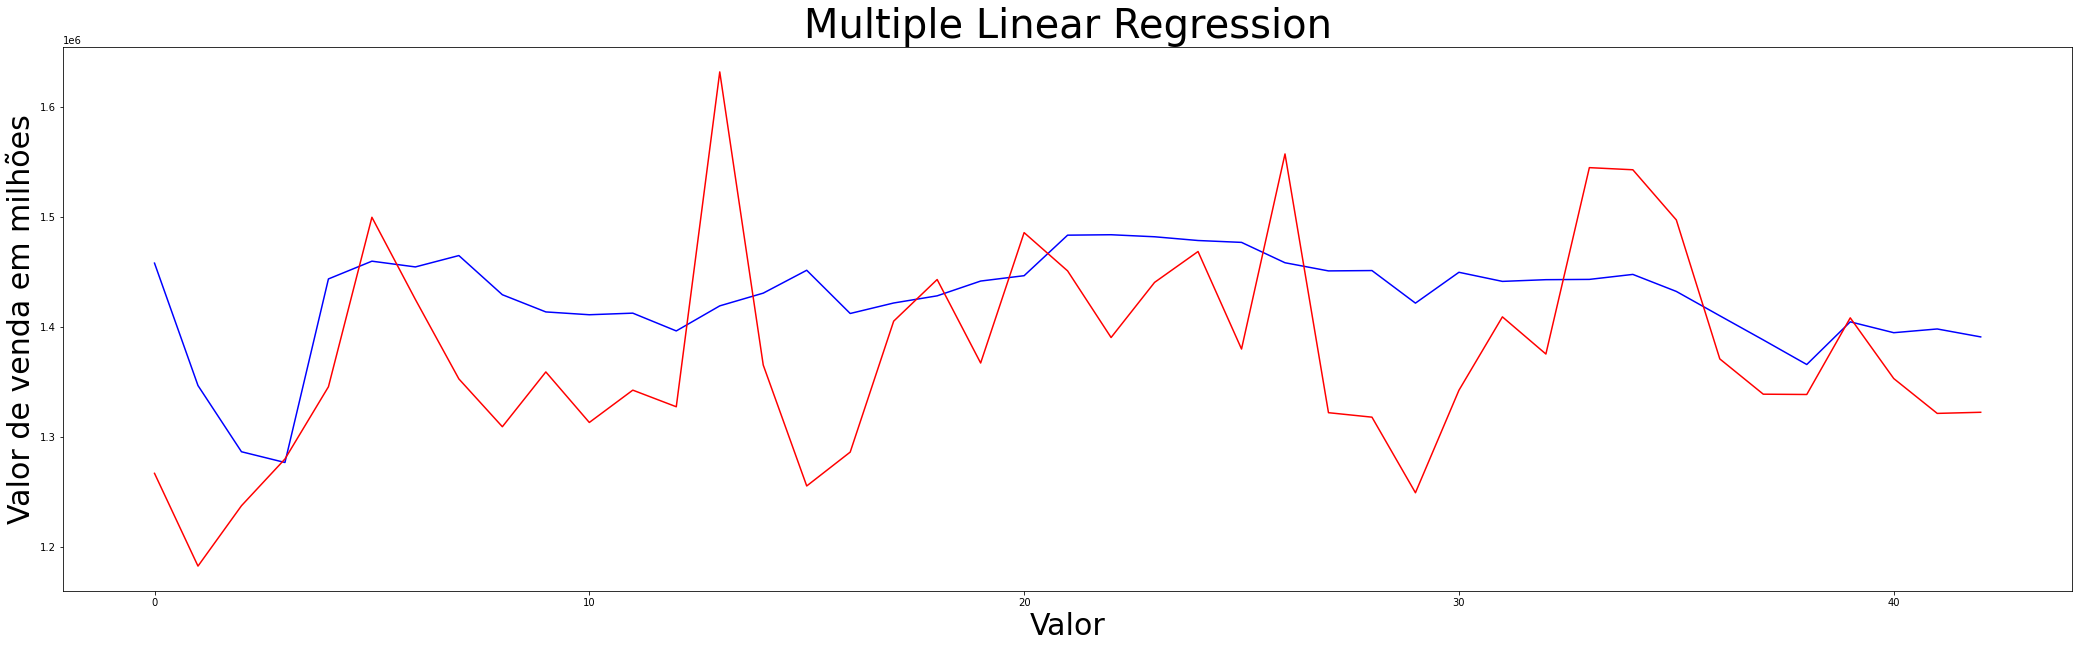

**************************************************
Resultados Loja 20:
0.09080280439388178 103854.36315236666 142203.23275065207


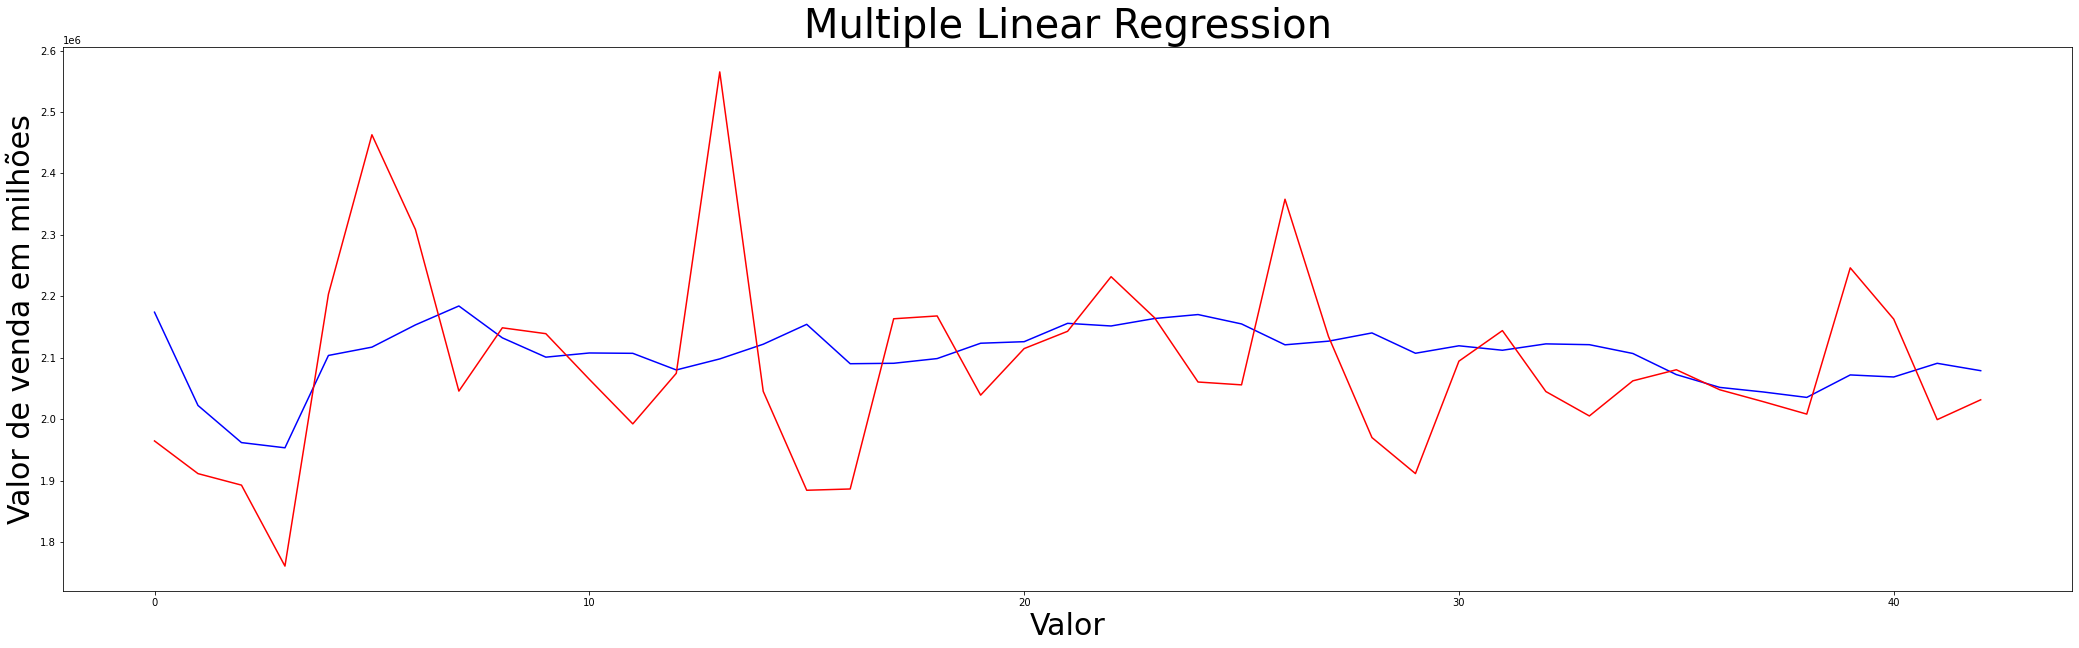

**************************************************
Resultados Loja 21:
-1.4771341859557756 69760.20634274 80526.89226922925


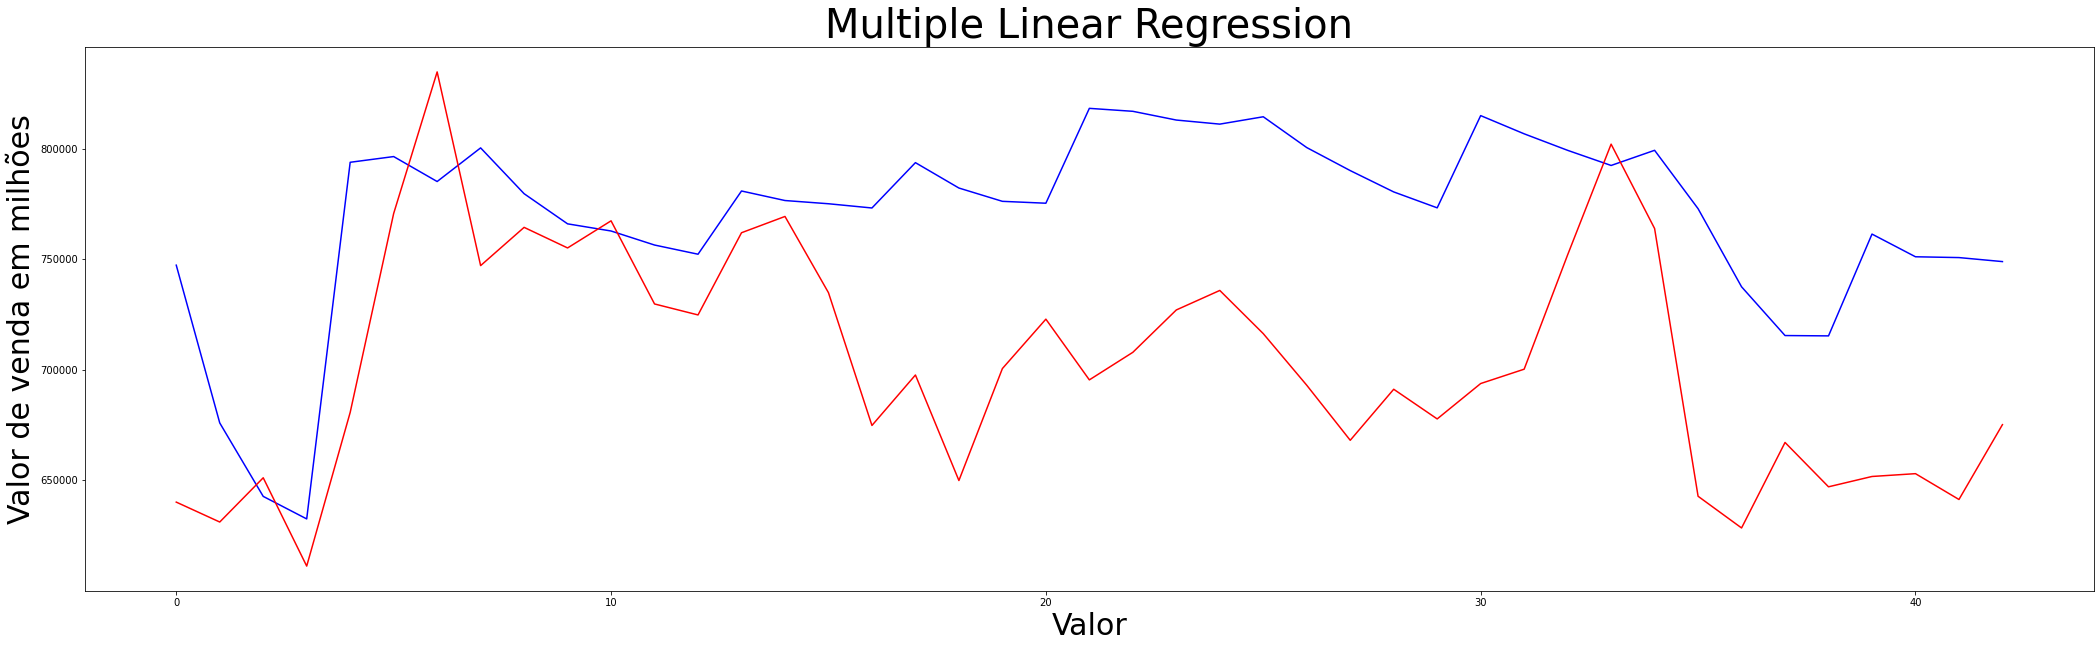

**************************************************
Resultados Loja 22:
0.26439539652641586 49319.42414048119 62426.42023478674


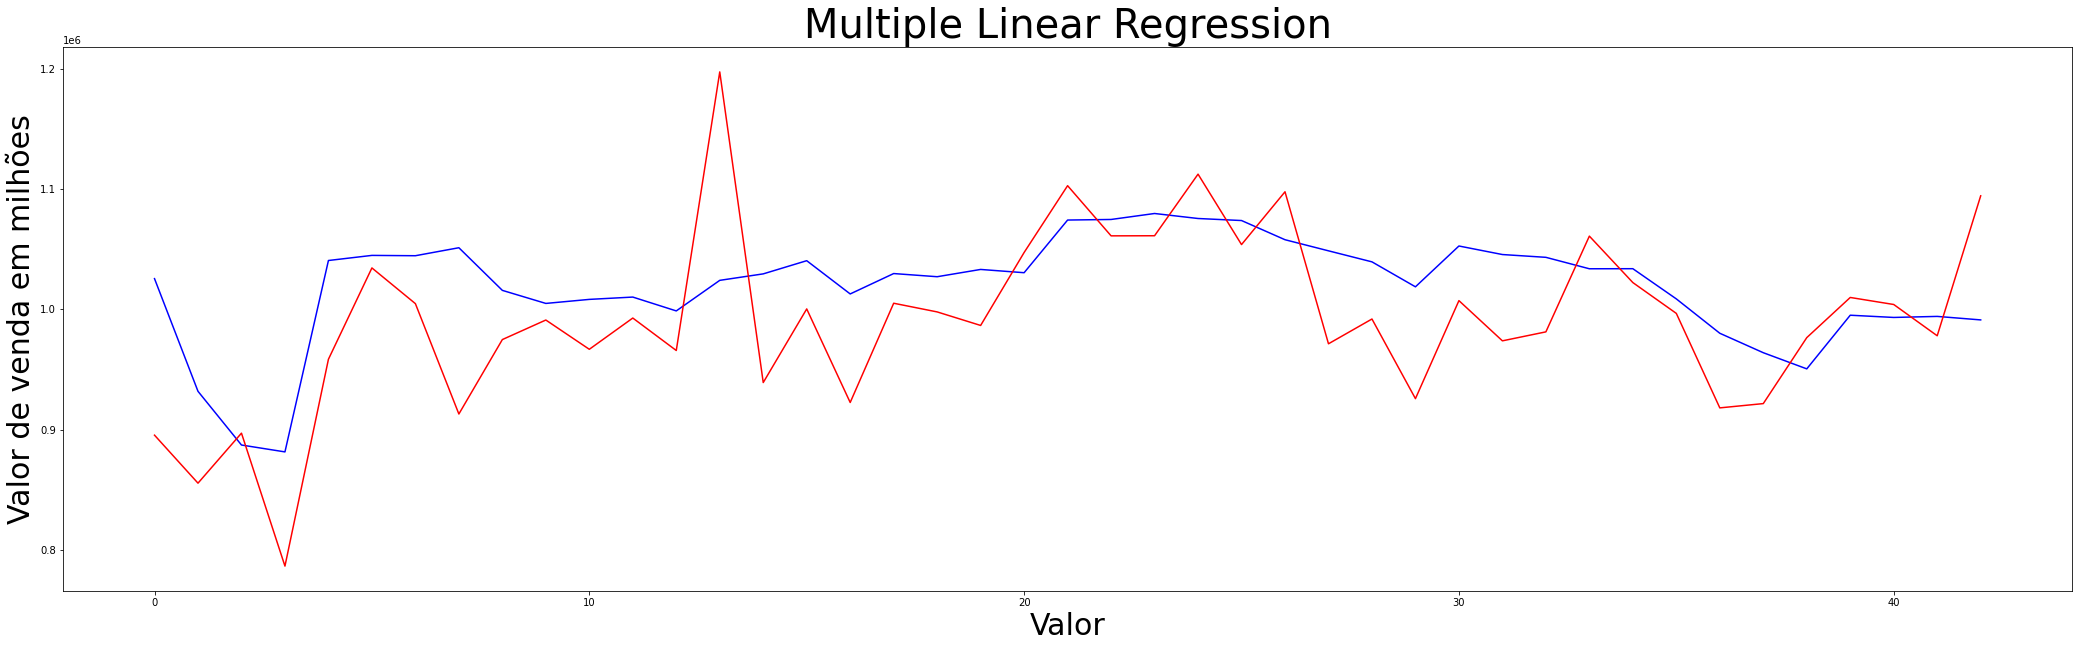

**************************************************
Resultados Loja 23:
0.37406142878013005 86852.01758280899 112021.90308364197


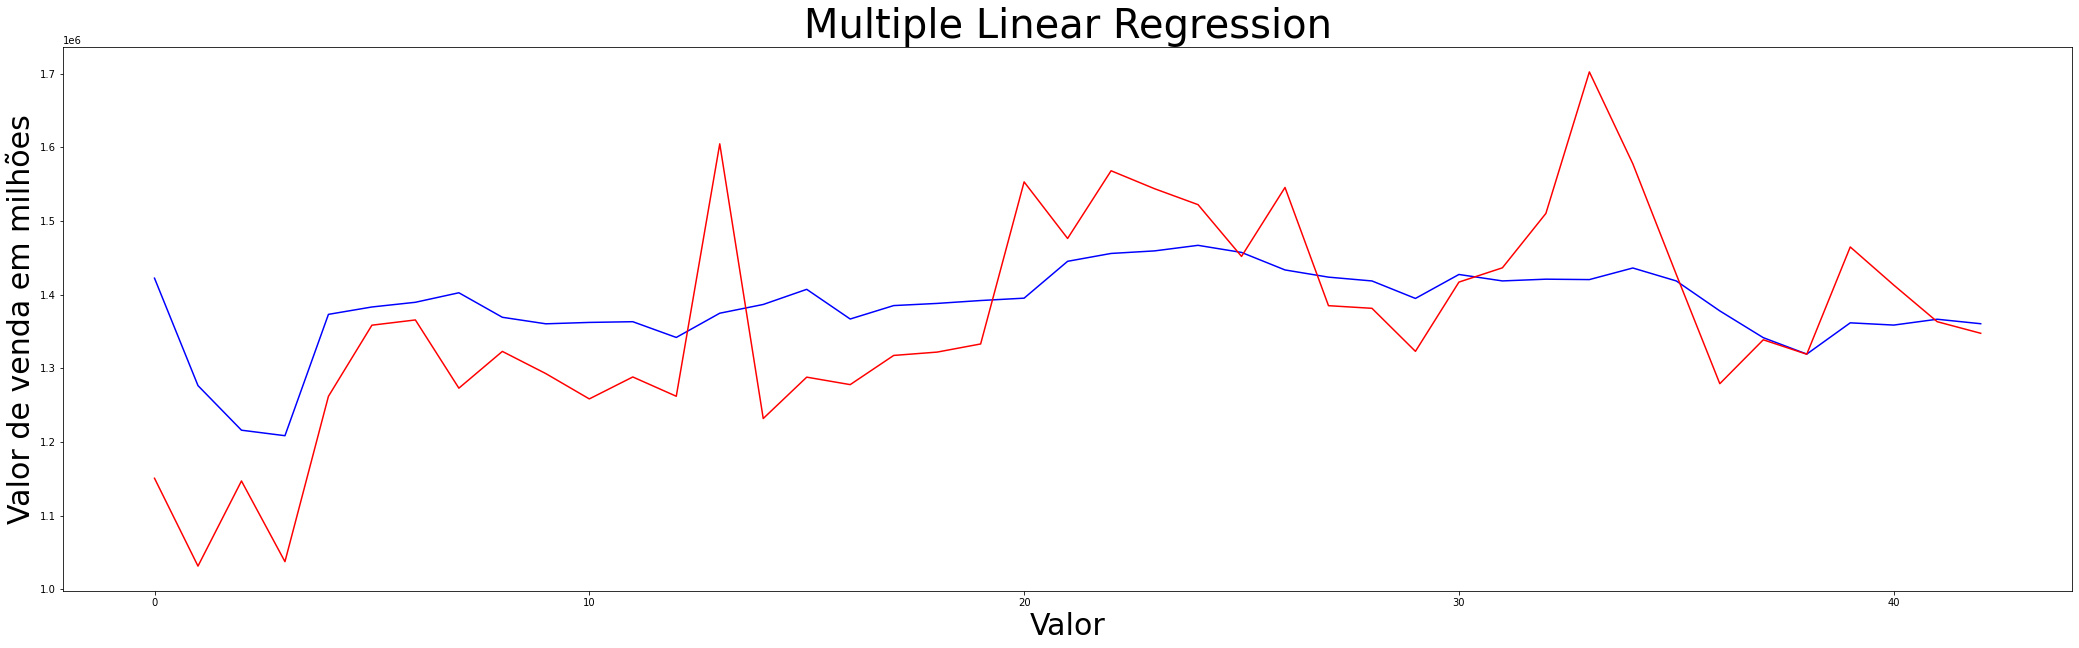

**************************************************
Resultados Loja 24:
0.3486465673267102 69401.23538487186 90595.2587079105


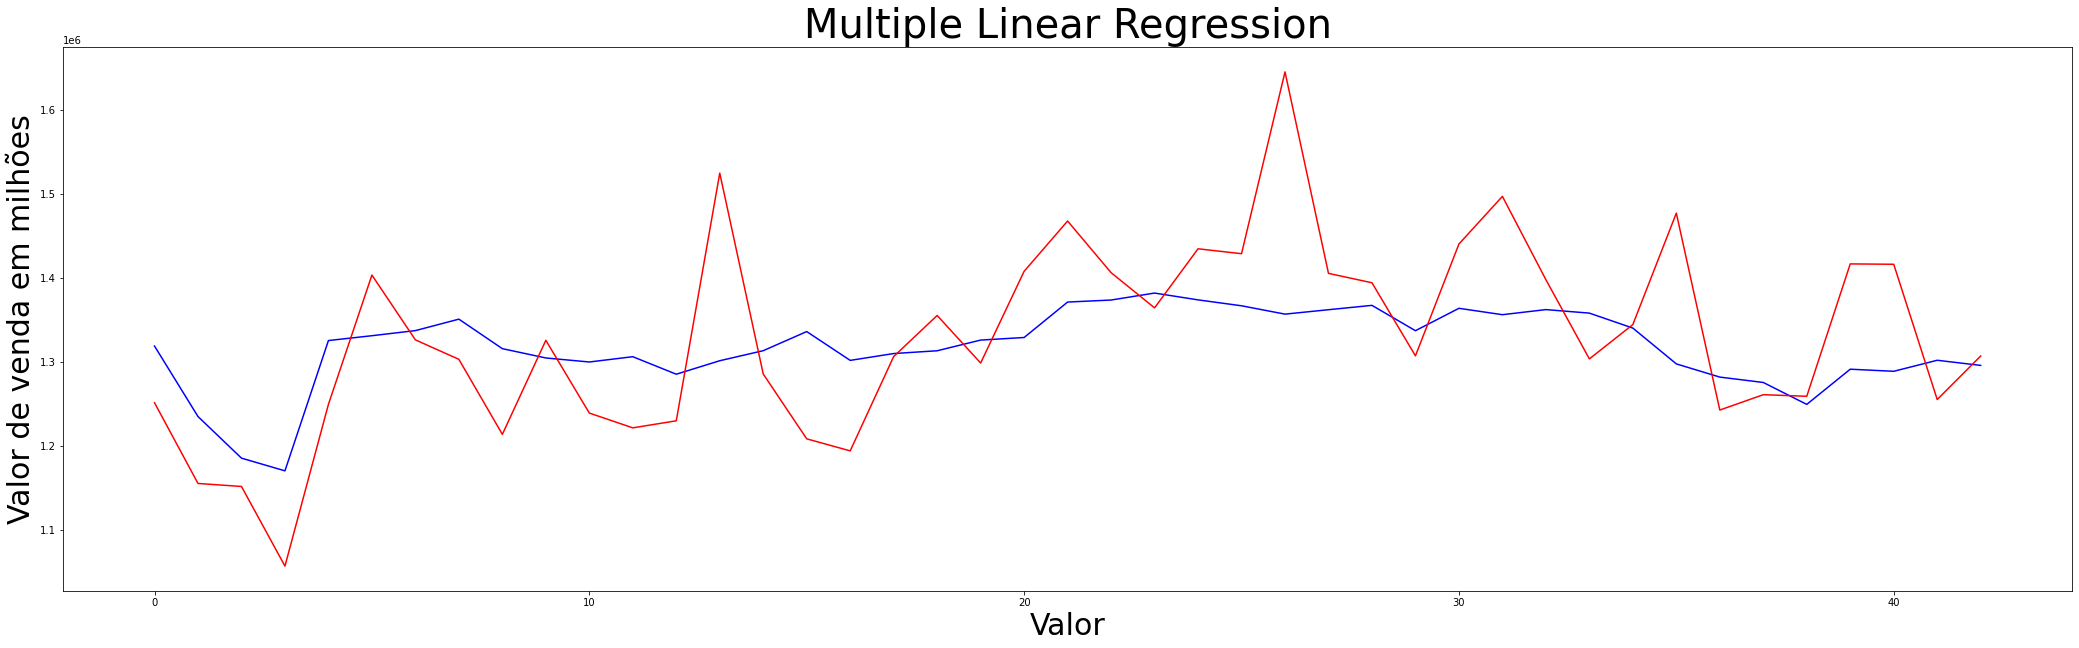

**************************************************
Resultados Loja 25:
0.2273966759628433 33168.748761538955 40791.552552831374


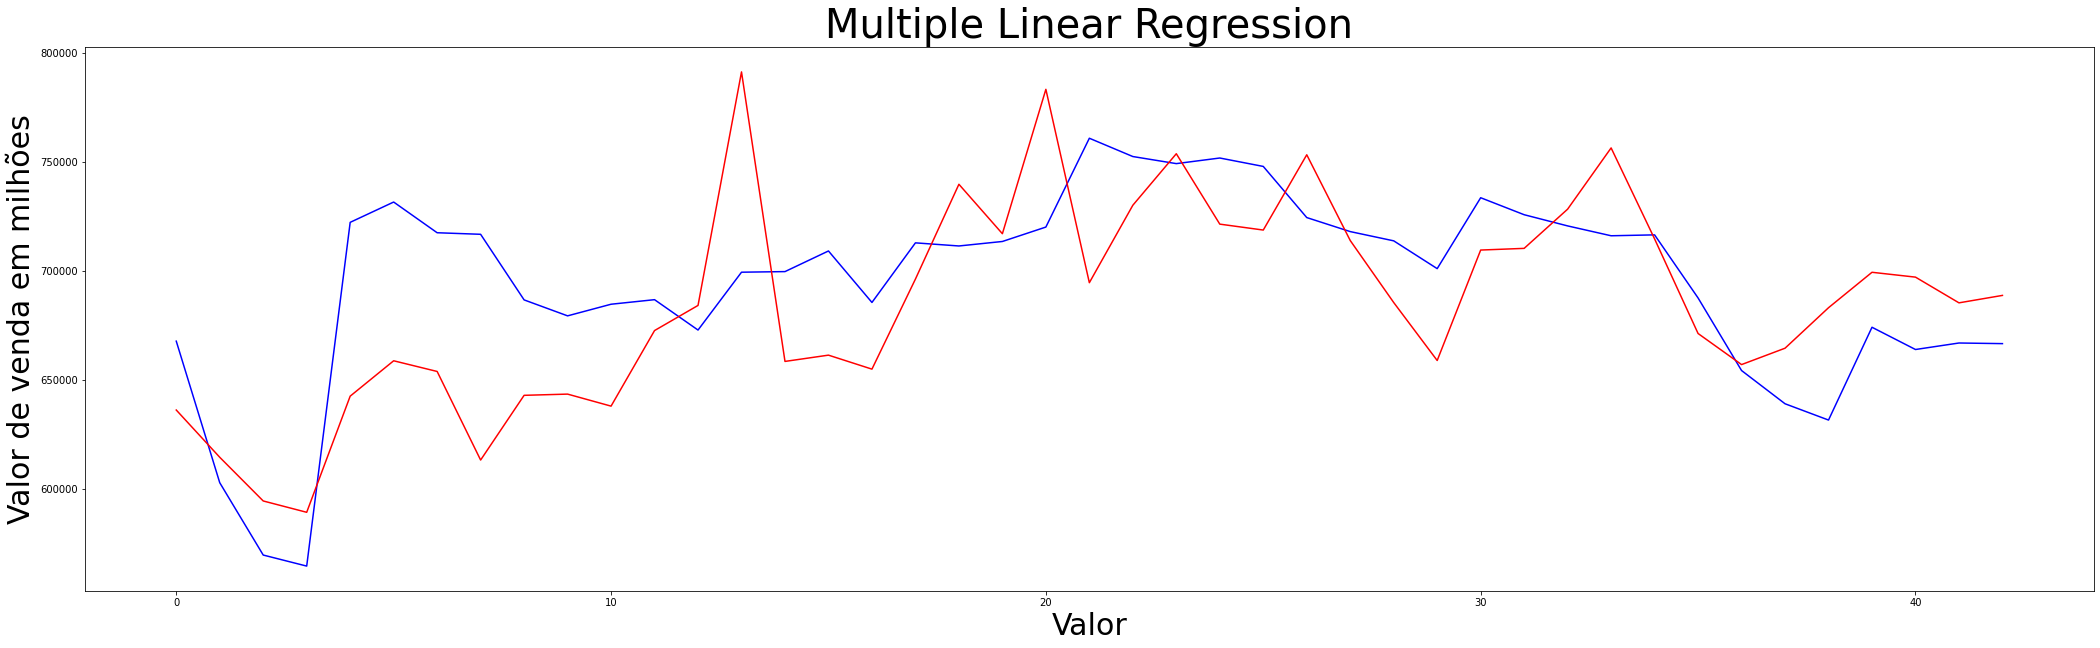

**************************************************
Resultados Loja 26:
0.42175167373217826 51259.78671569451 63376.87662762935


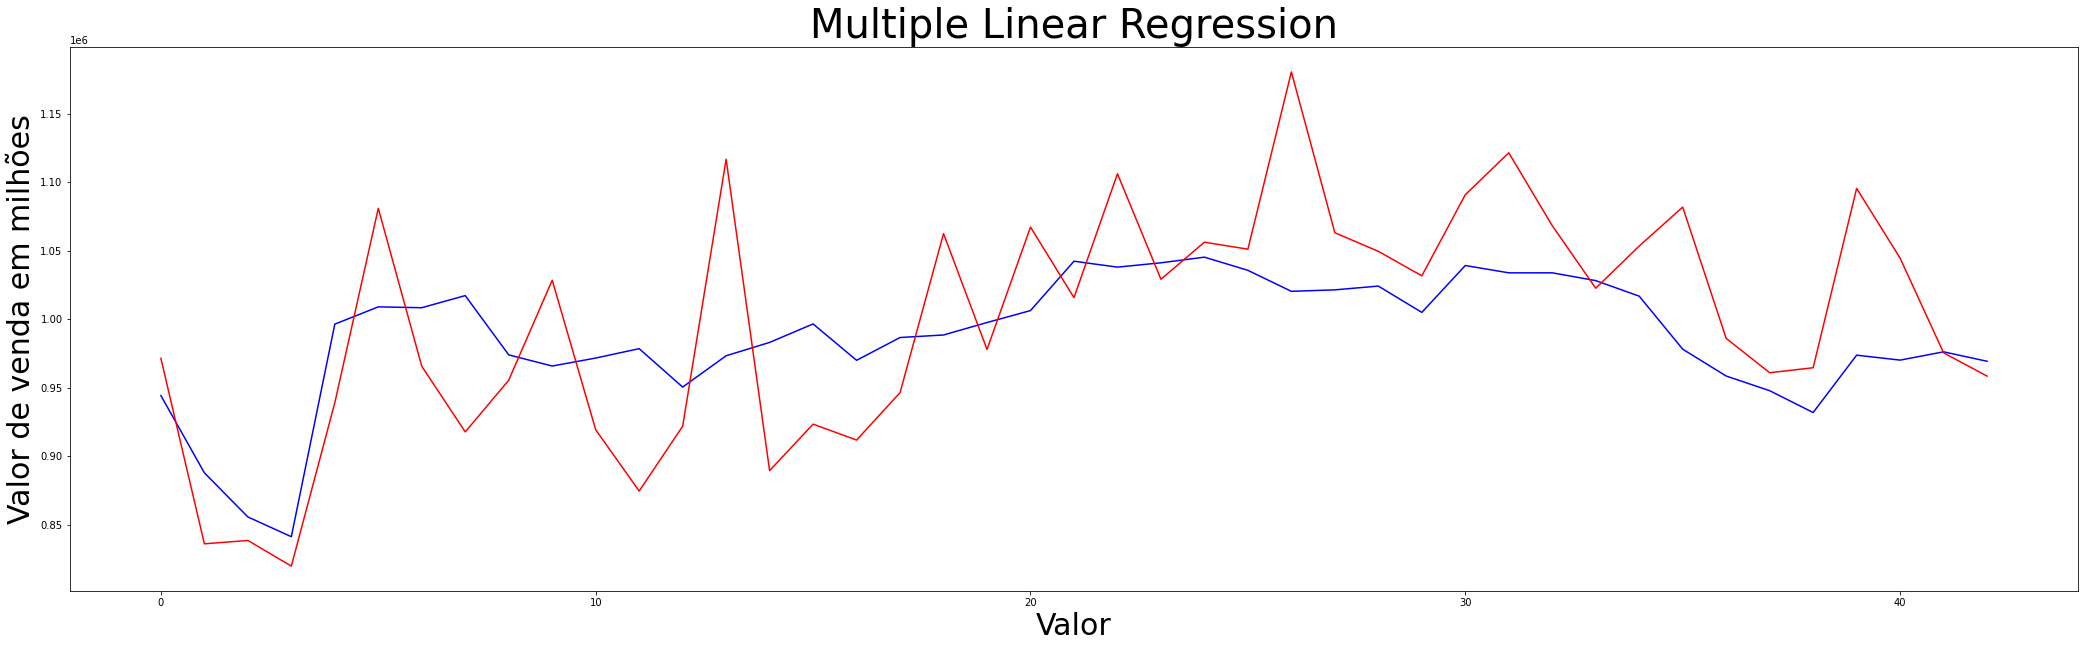

**************************************************
Resultados Loja 27:
-0.03063367577337983 117236.16045321157 137114.0870850525


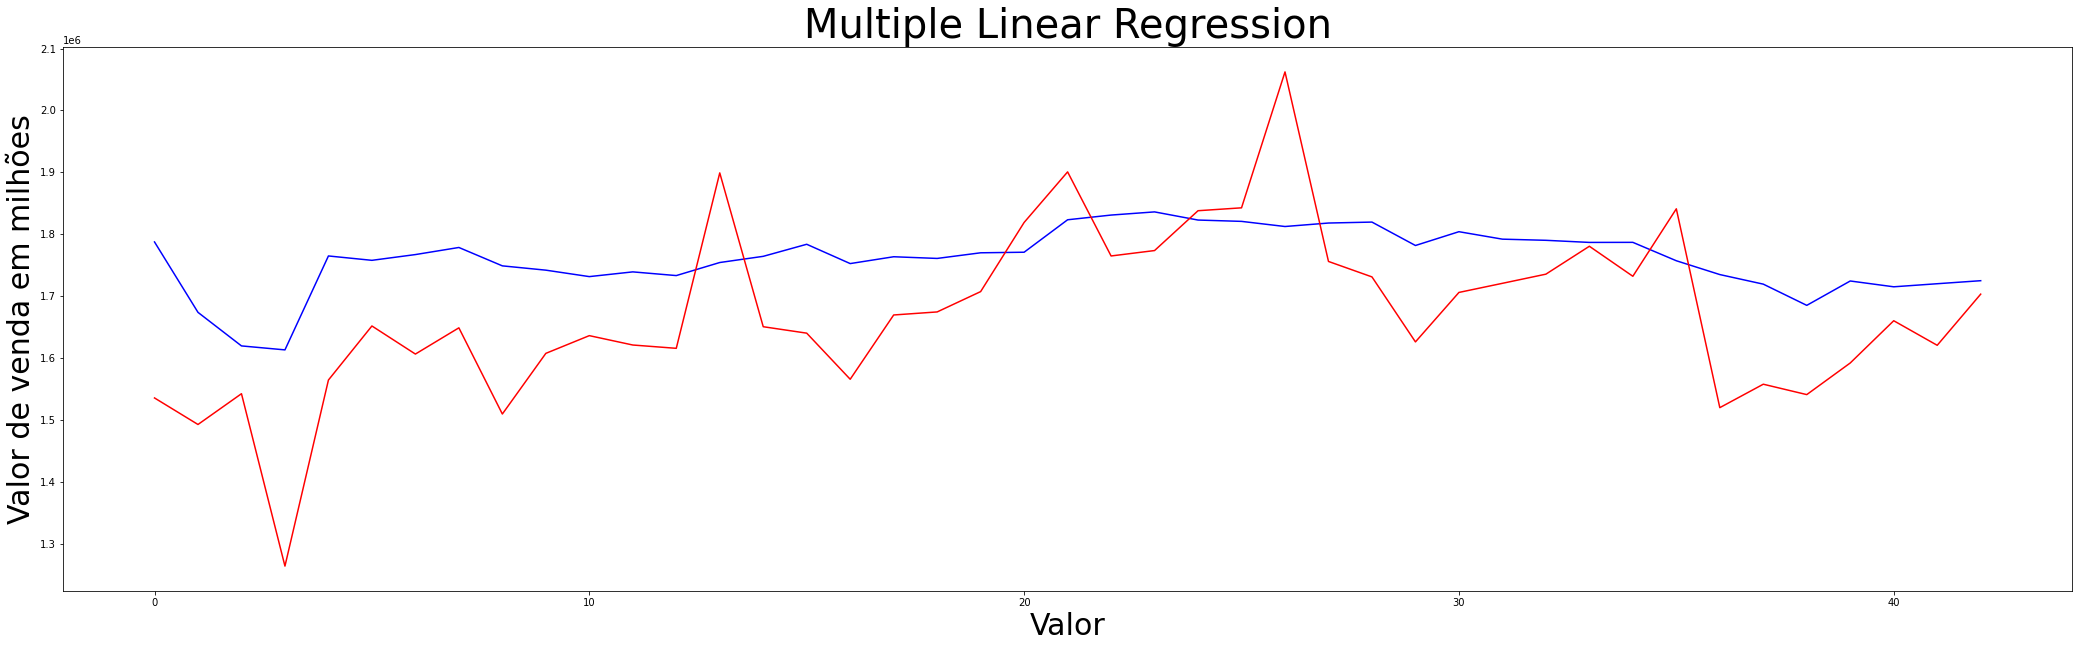

**************************************************
Resultados Loja 28:
-0.12224127727229539 147858.75010641702 161290.55363228198


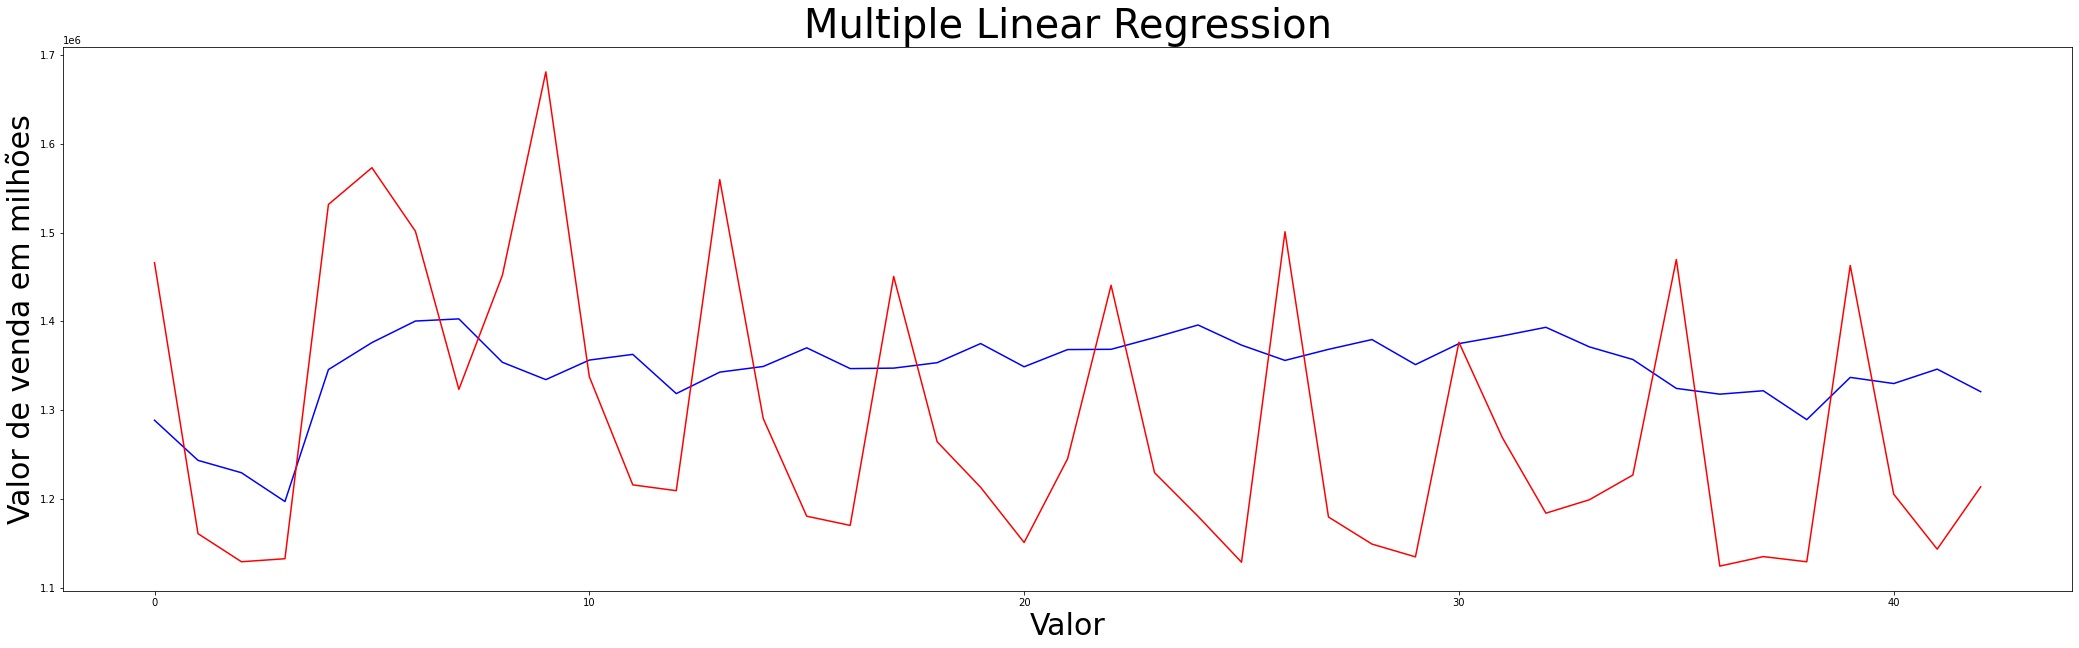

**************************************************
Resultados Loja 29:
0.25289183845826824 29382.25763743006 39744.29109784846


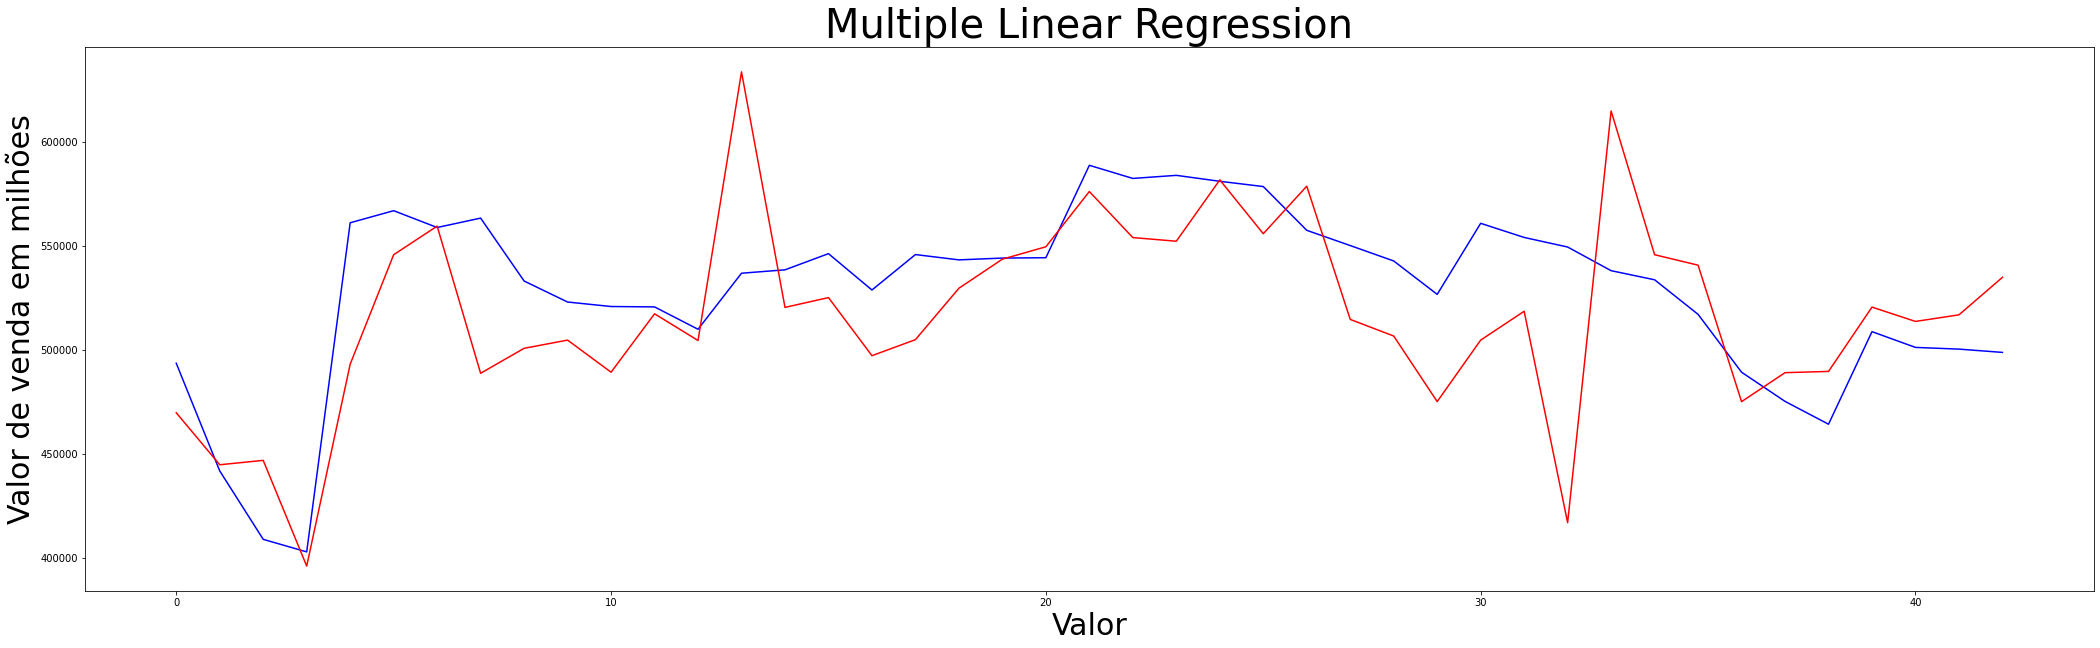

**************************************************
Resultados Loja 30:
-16.156536864280532 36588.5685891276 48559.31210972998


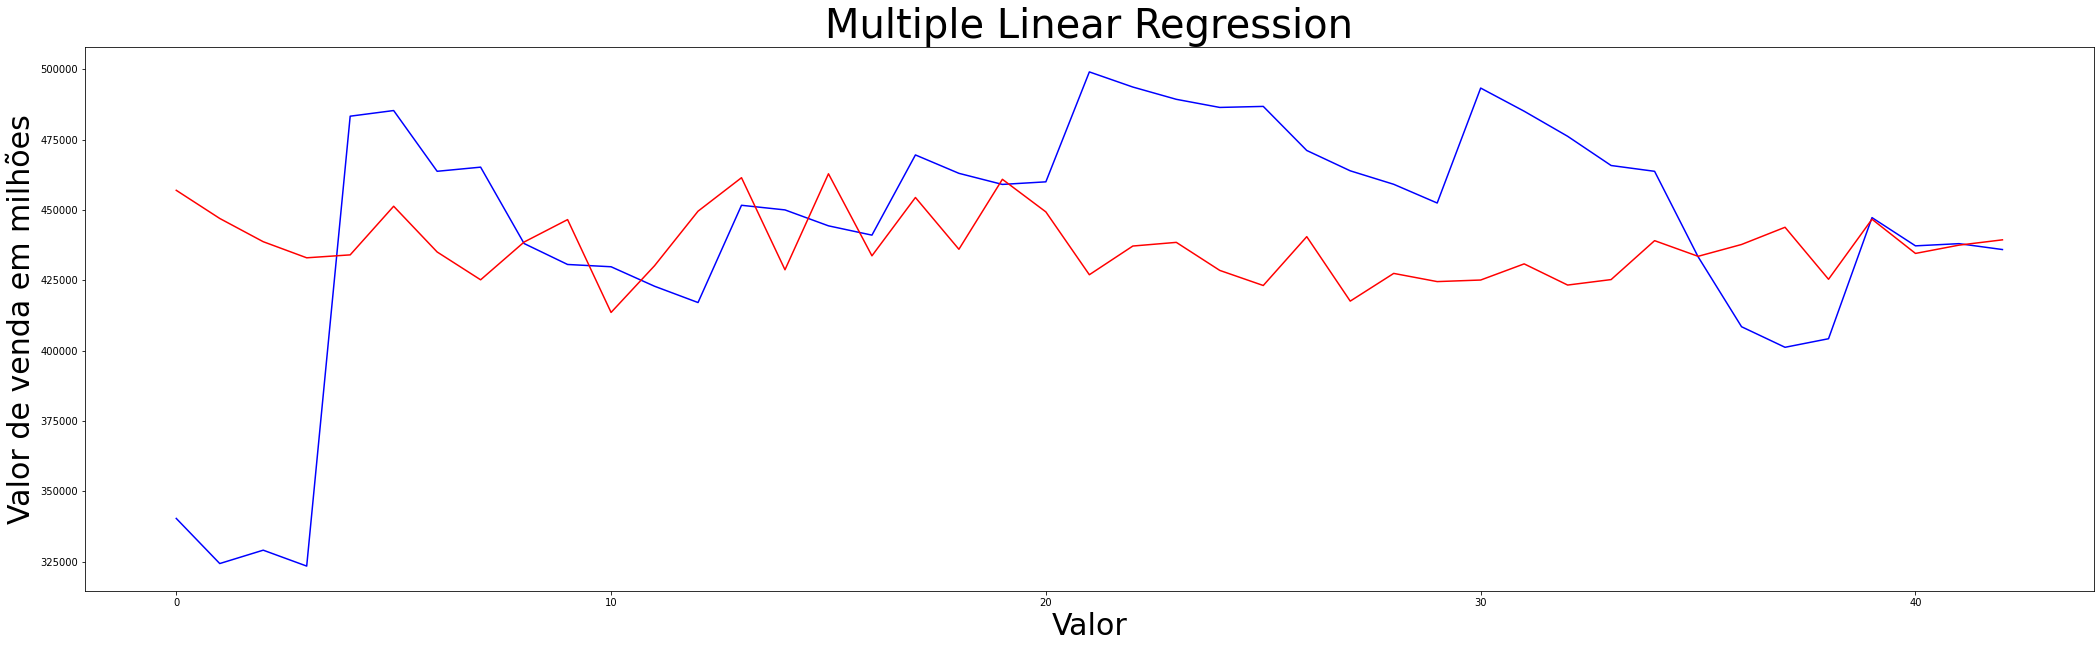

**************************************************
Resultados Loja 31:
0.010192349103965492 49036.222793005516 58365.682580866705


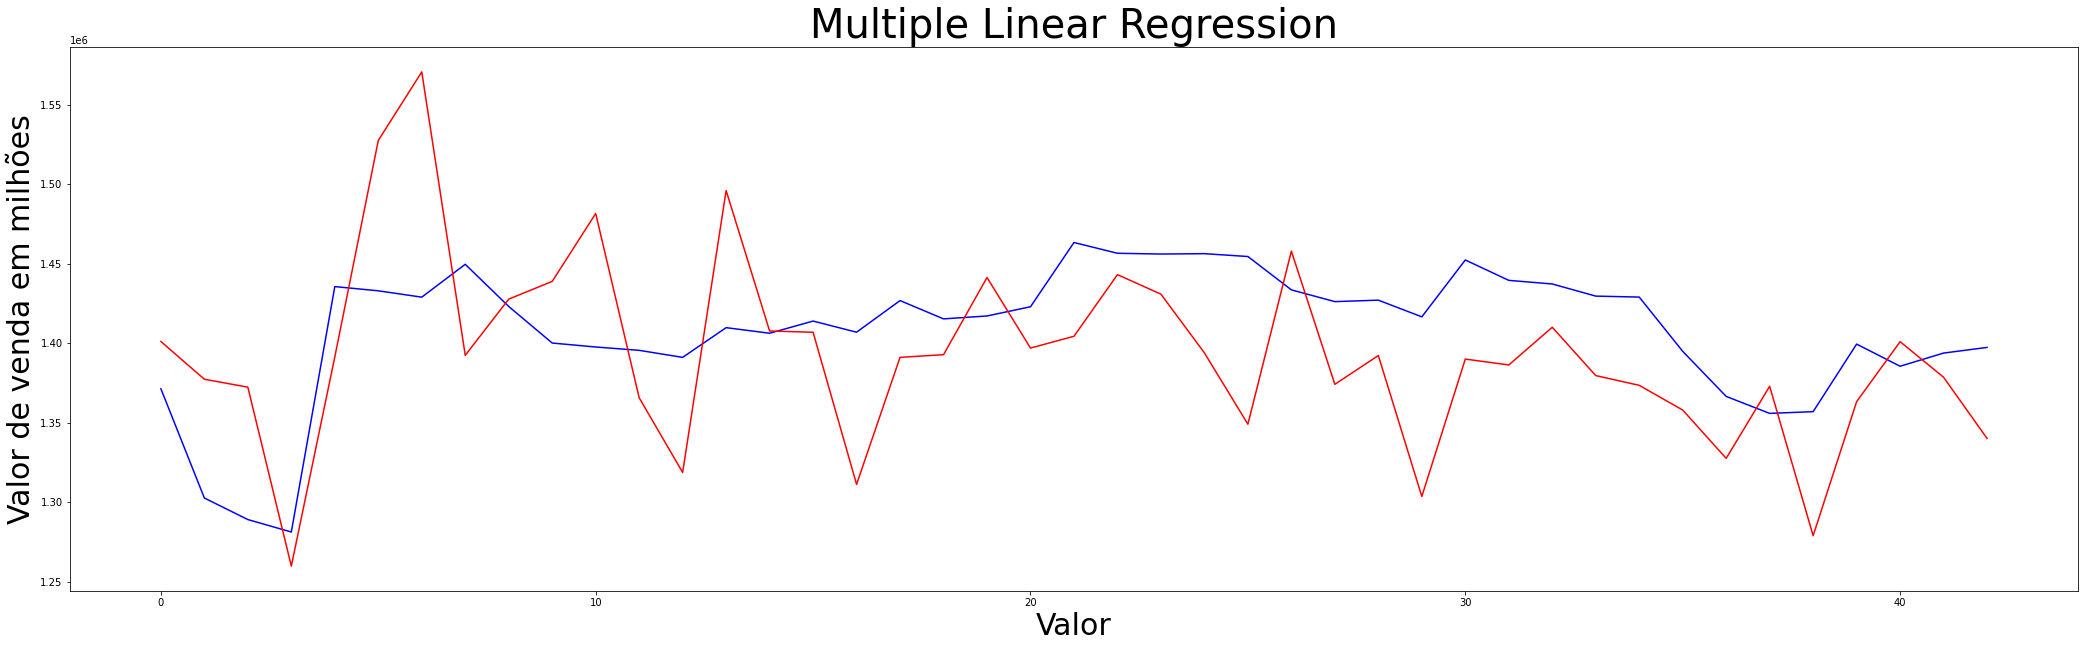

**************************************************
Resultados Loja 32:
0.2943799553639014 37441.65100906658 44447.17143148384


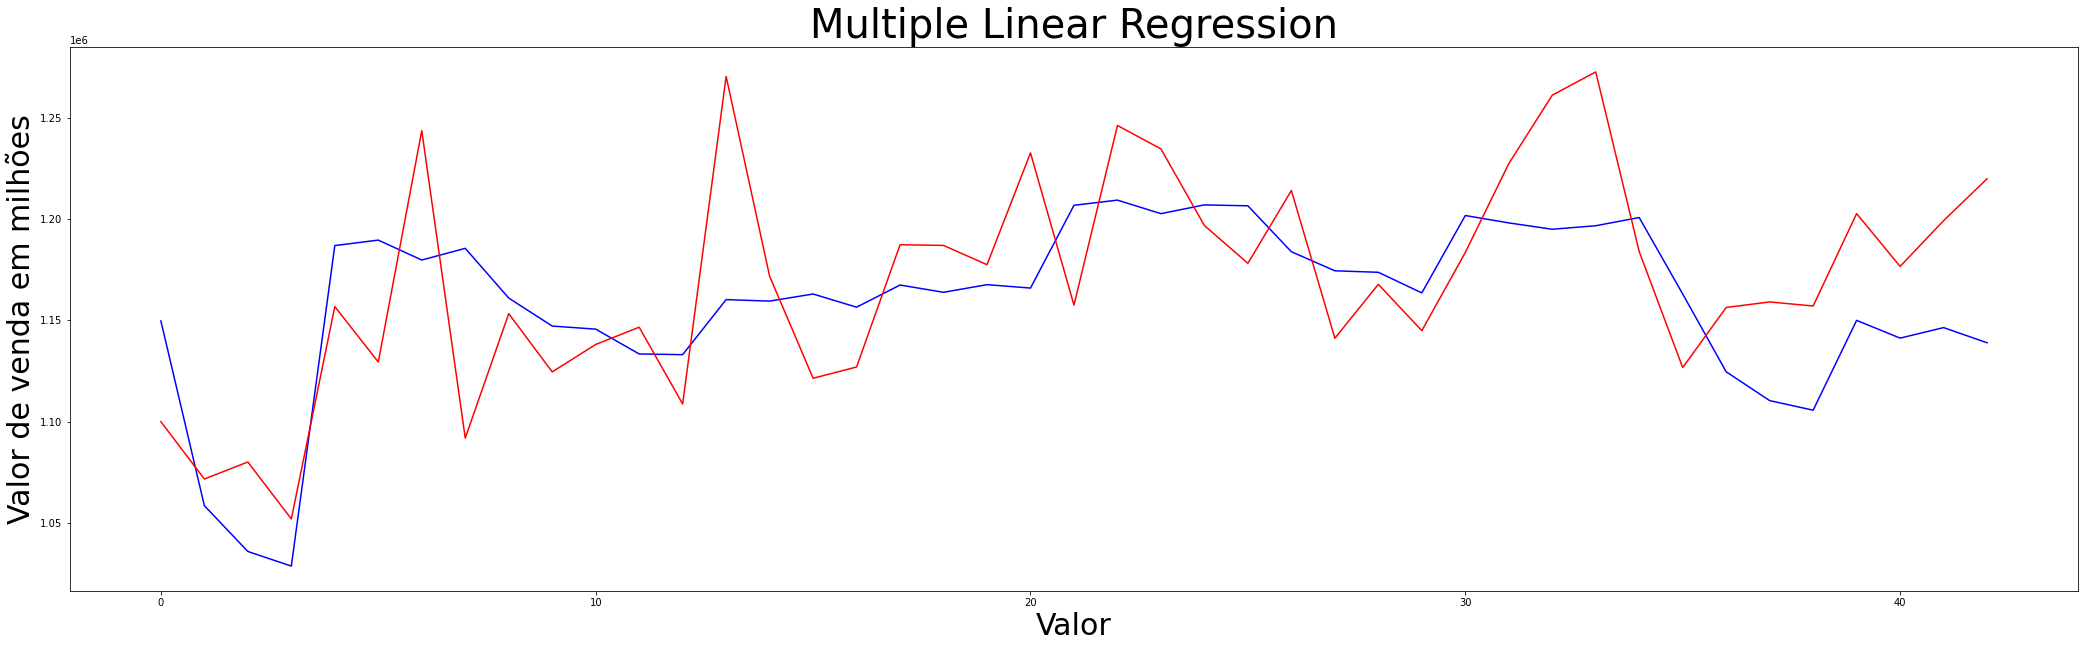

**************************************************
Resultados Loja 33:
-5.274783730860148 34448.96872414053 45882.40682003272


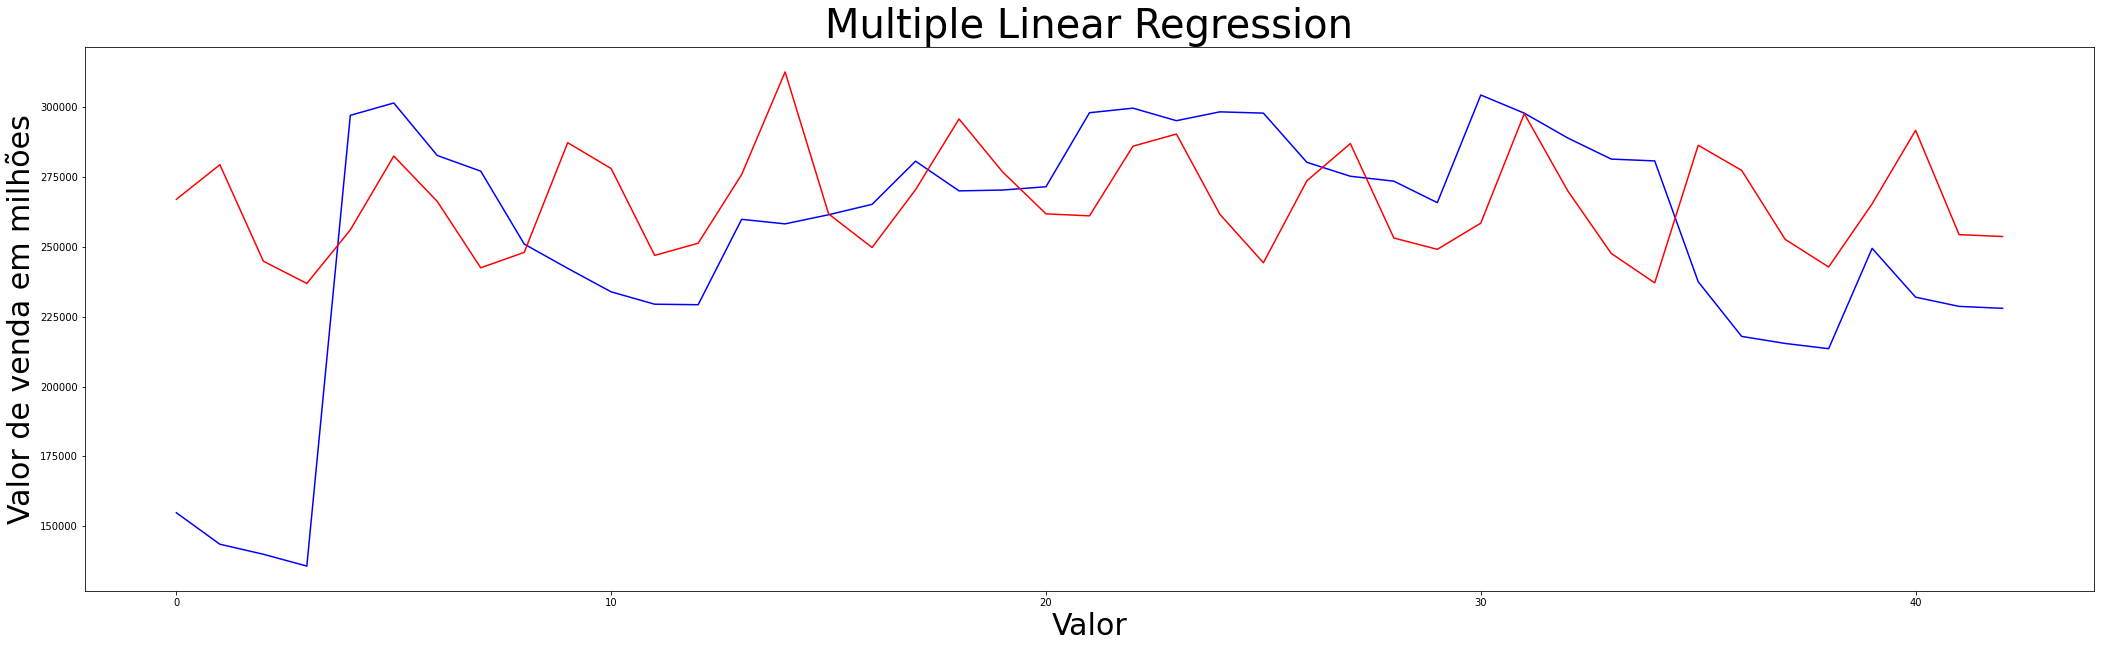

**************************************************
Resultados Loja 34:
-0.12248358620917887 37586.40659357158 47680.08419810234


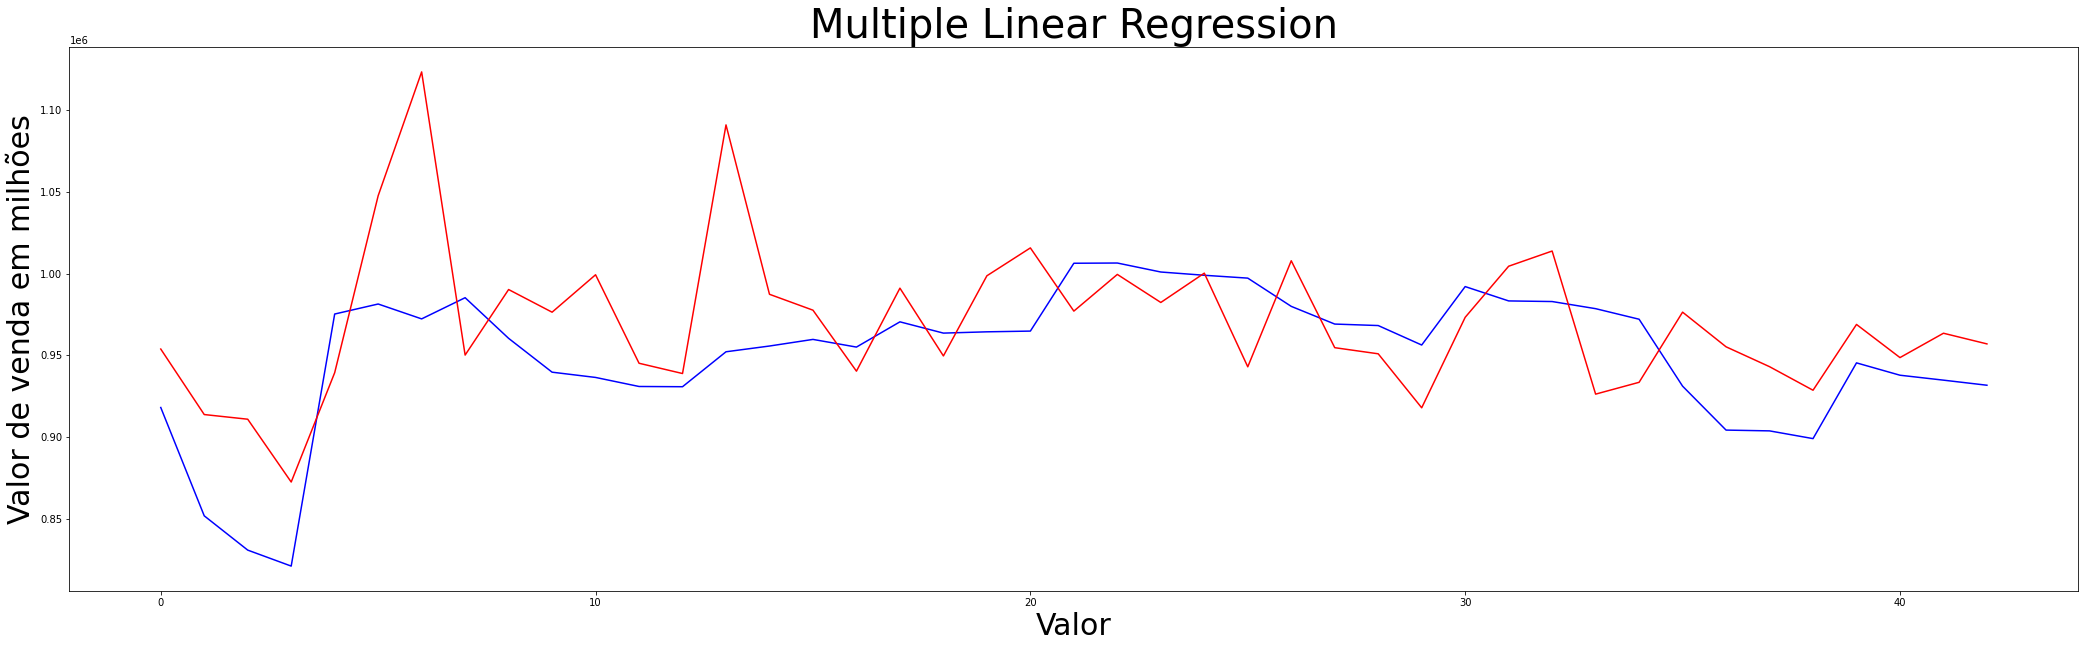

**************************************************
Resultados Loja 35:
-0.552124919063631 90579.458742908 103259.0204512808


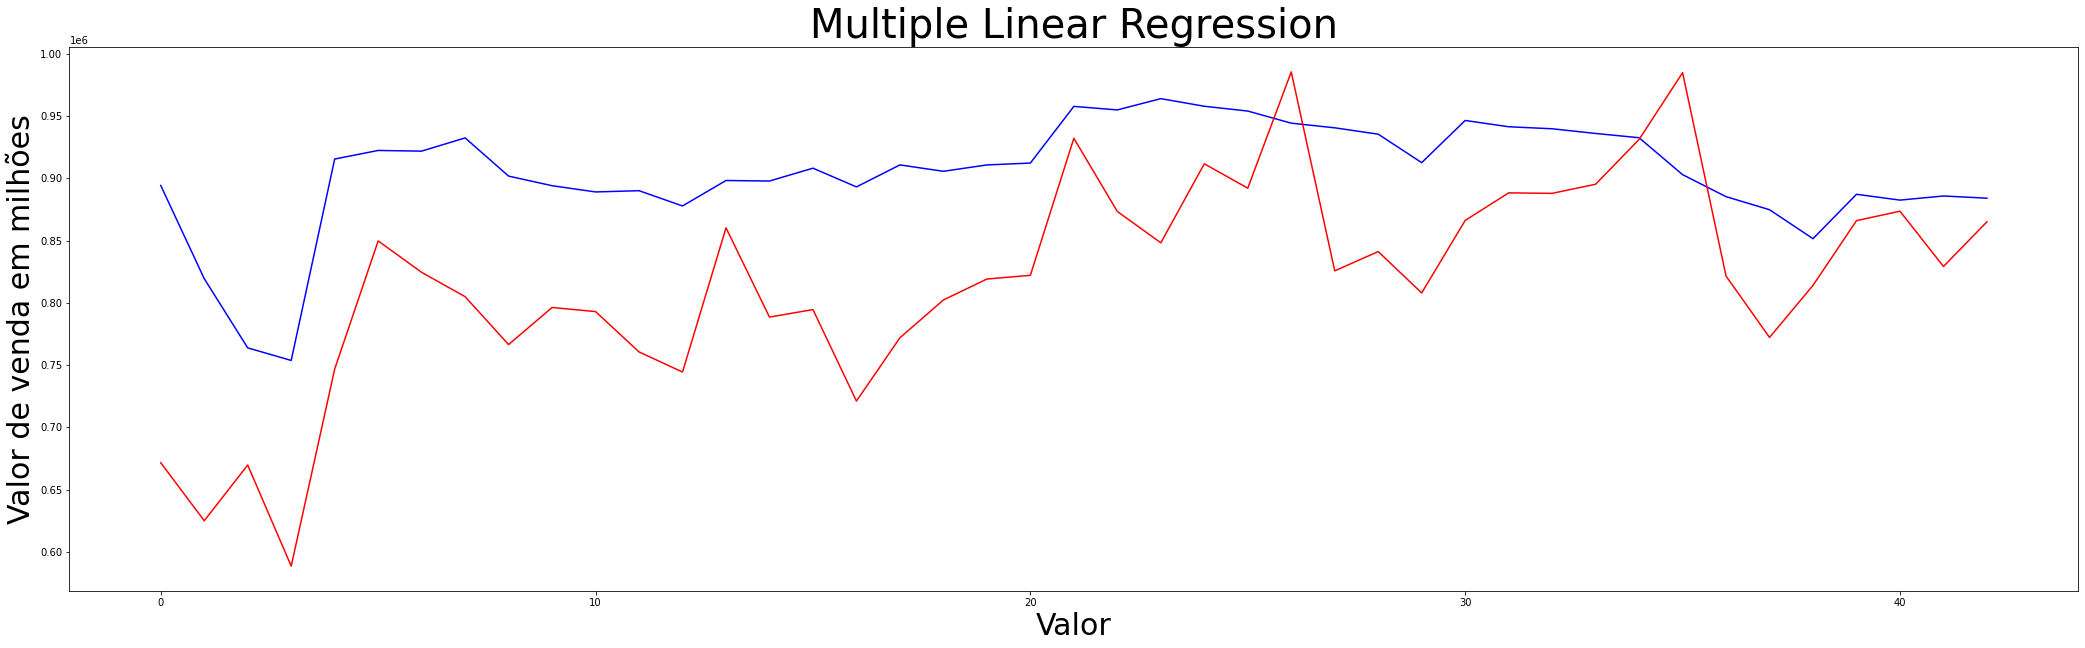

**************************************************
Resultados Loja 36:
-25.26897000513595 90076.23430333771 94999.80119918608


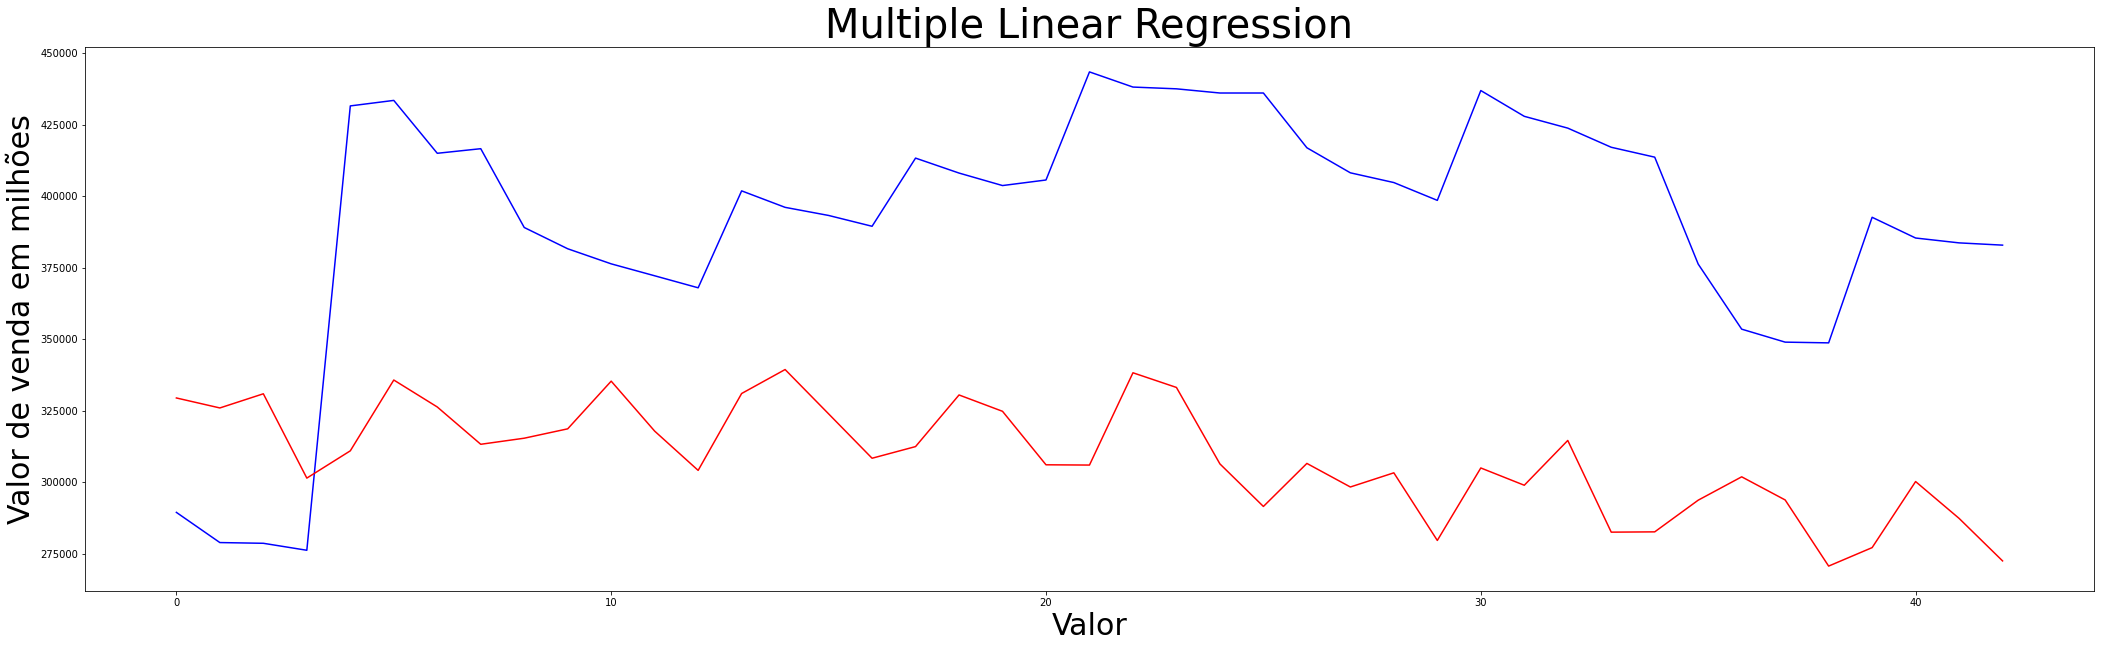

**************************************************
Resultados Loja 37:
-7.220713263904219 37306.15766200523 50090.896700124315


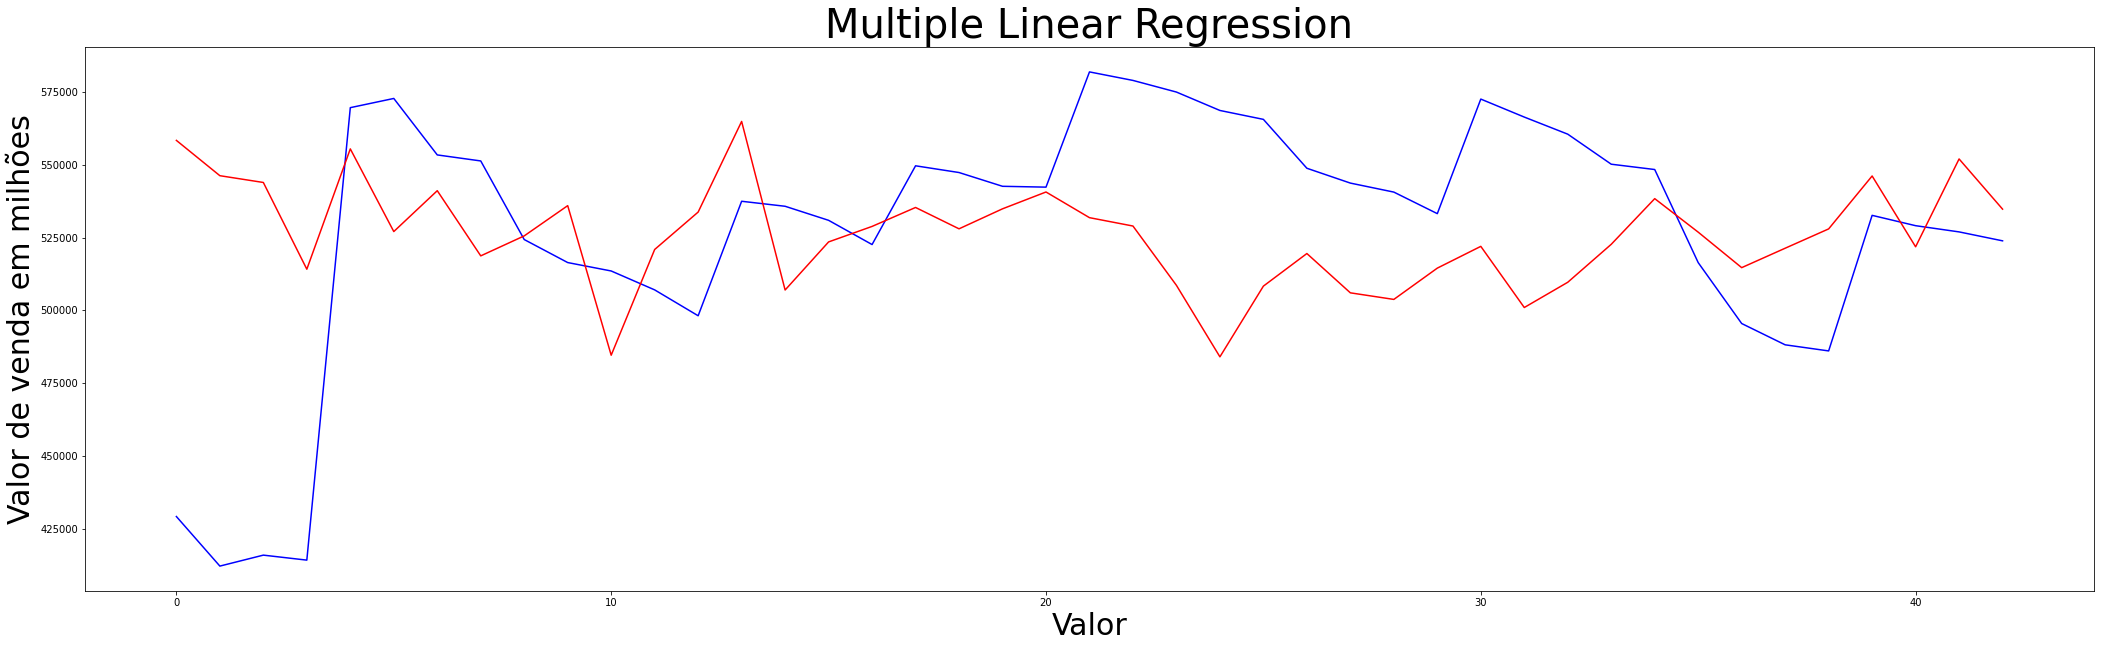

**************************************************
Resultados Loja 38:
-5.096905191786113 48348.50231255712 67269.79046353186


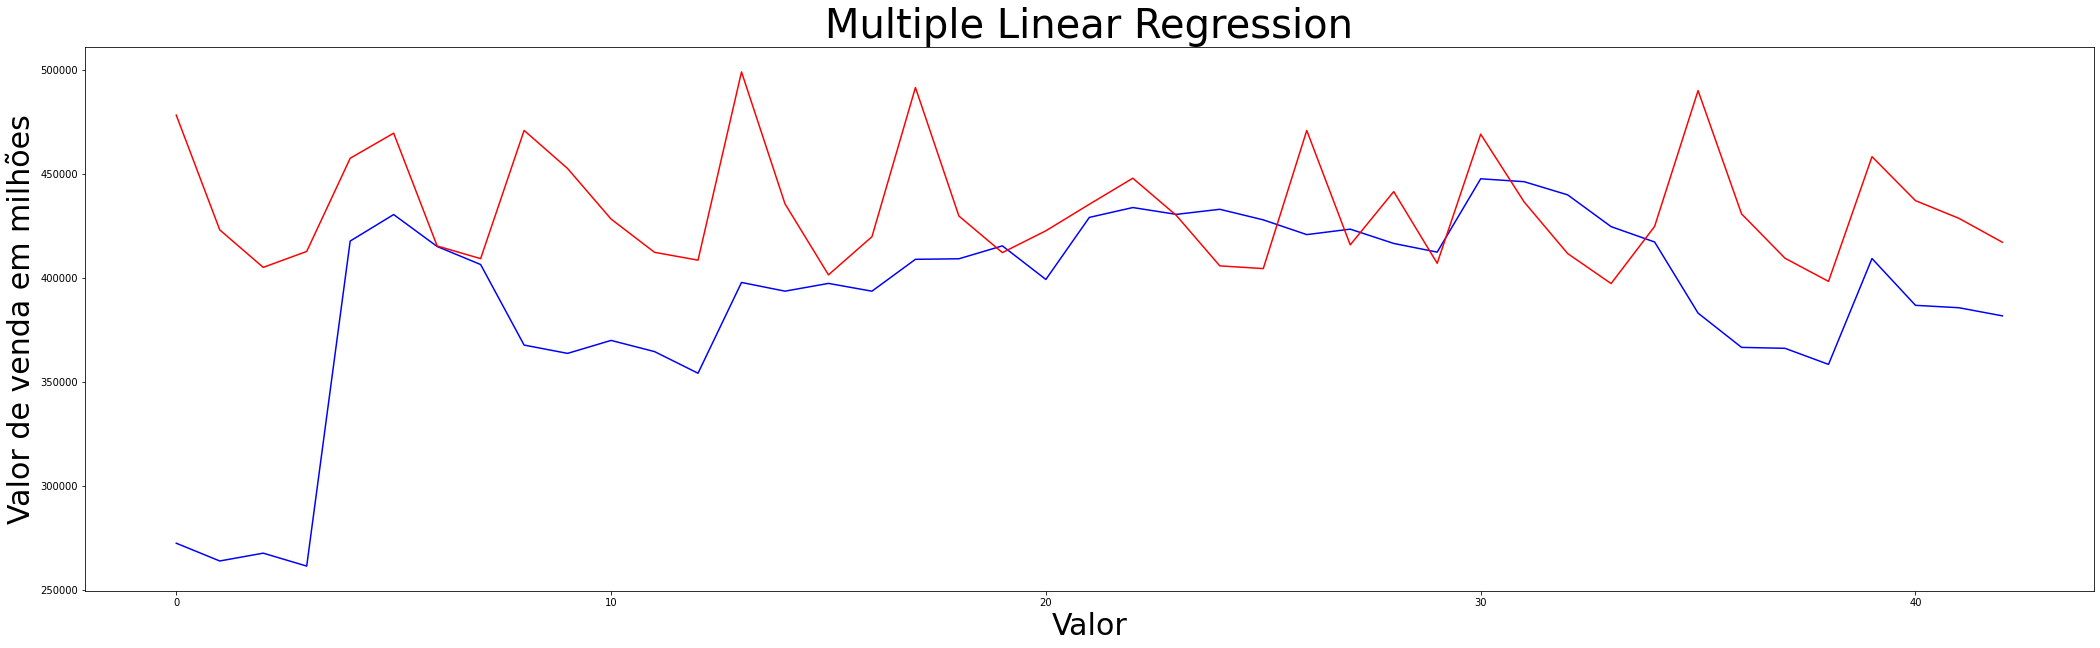

**************************************************
Resultados Loja 39:
-0.2434167507888778 85772.21201178827 110572.43816872001


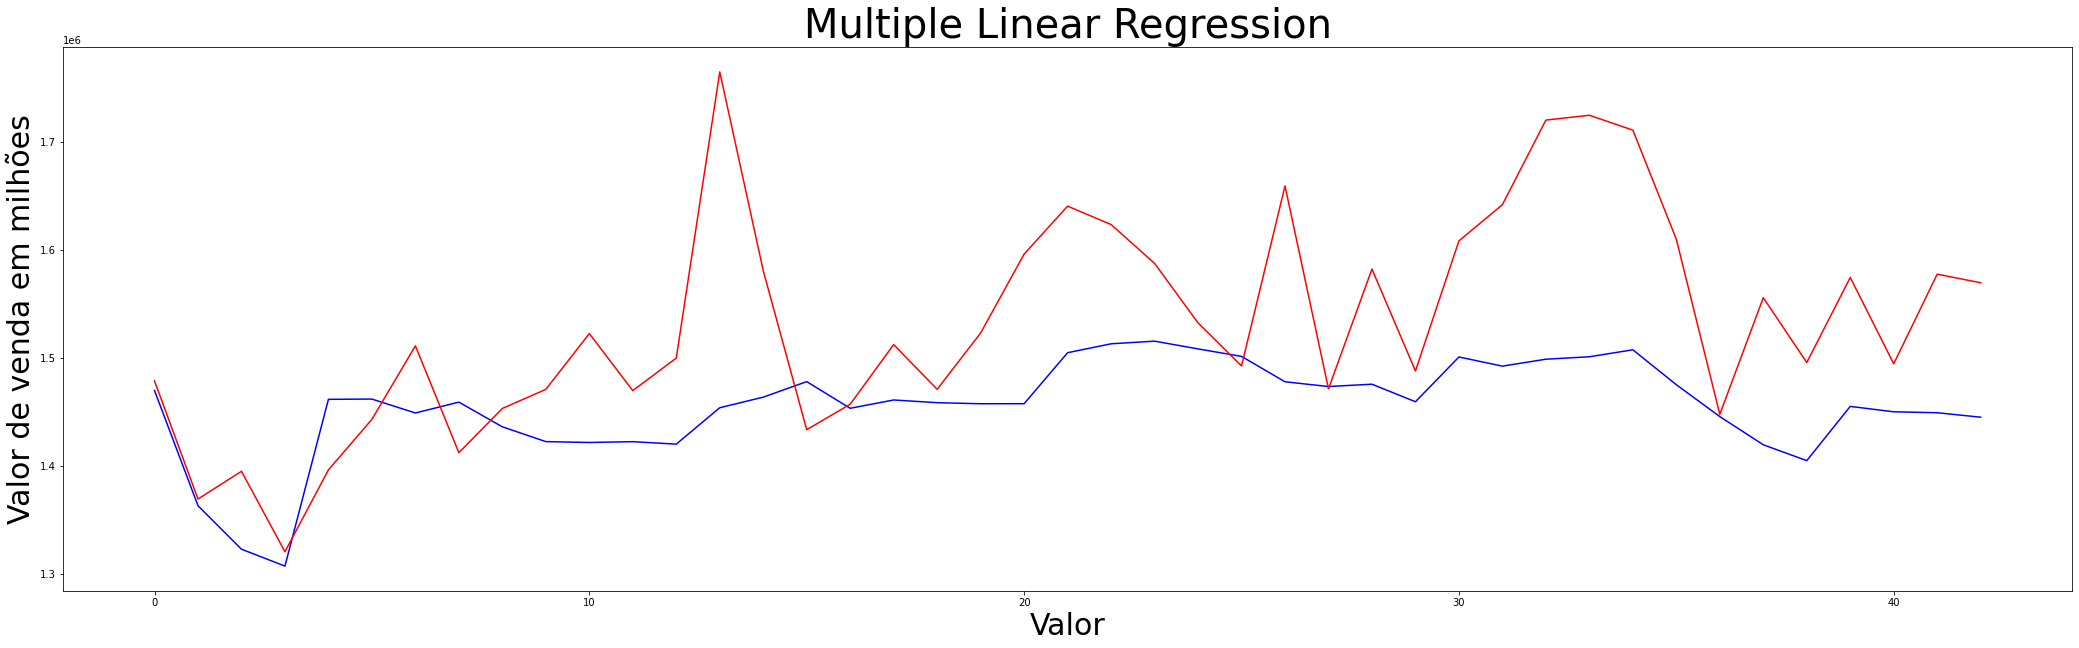

**************************************************
Resultados Loja 40:
0.3843601479099682 47348.75361561893 66735.29635938597


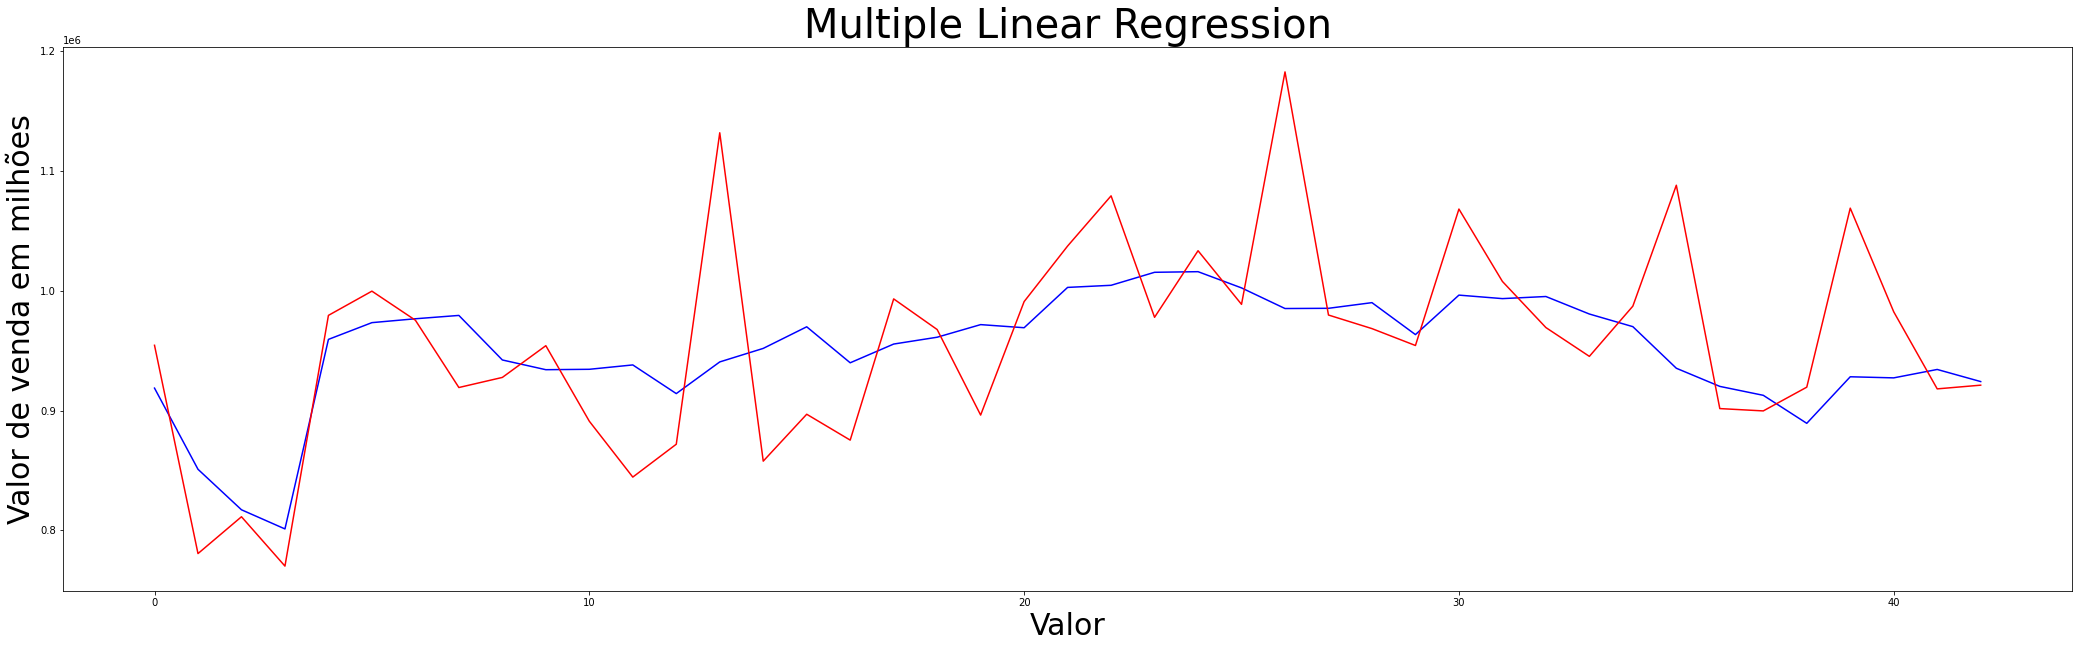

**************************************************
Resultados Loja 41:
-0.025142470873147804 85077.14407582981 105072.83473854949


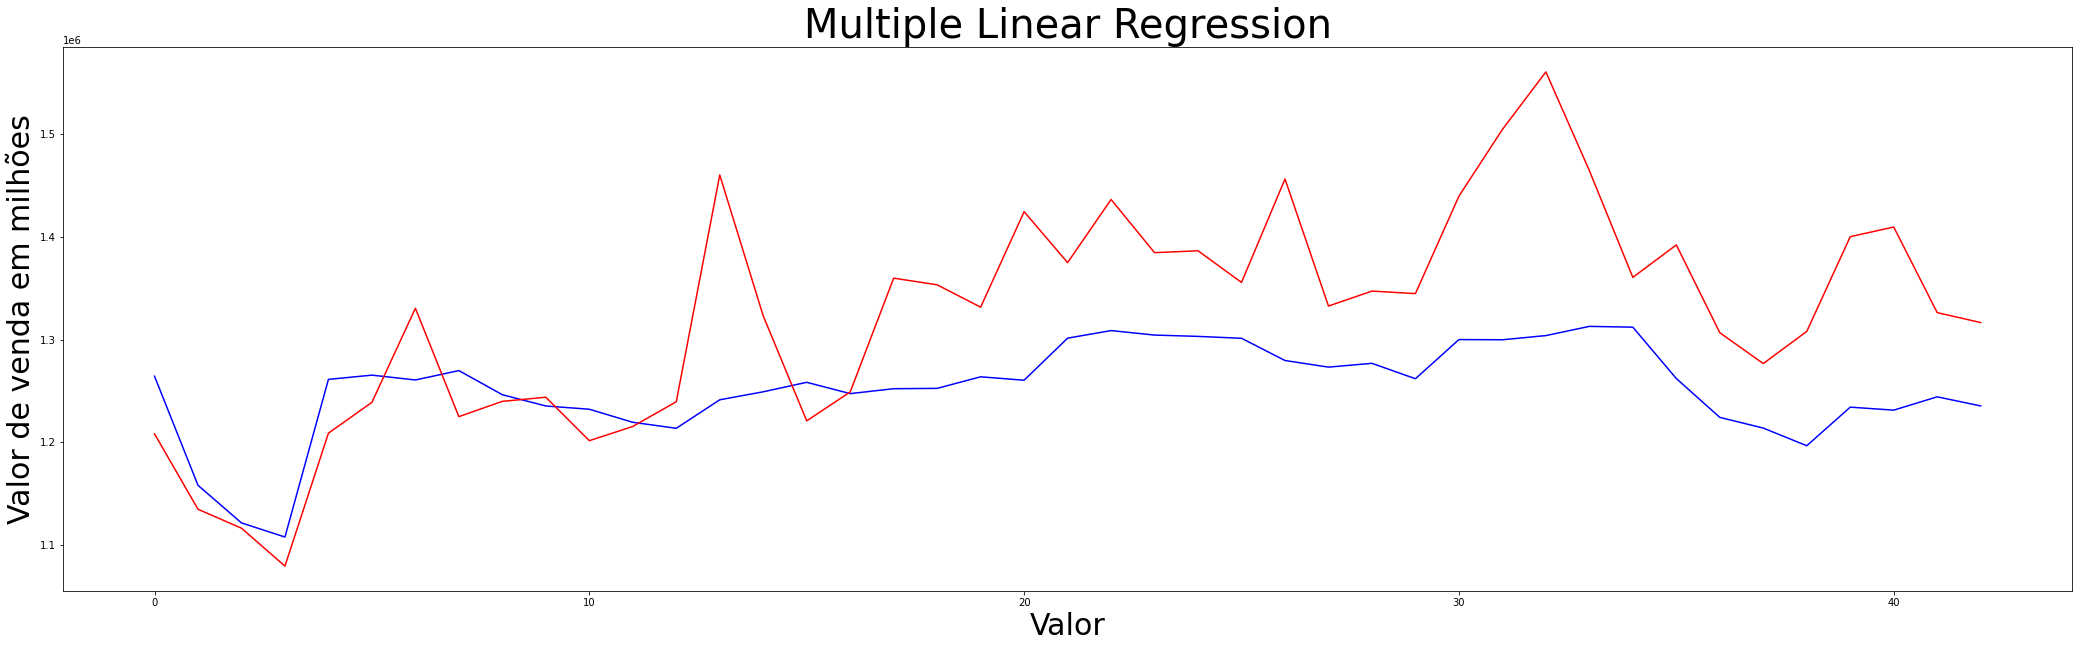

**************************************************
Resultados Loja 42:
-1.5138699206734287 58249.385281921604 76622.30331761952


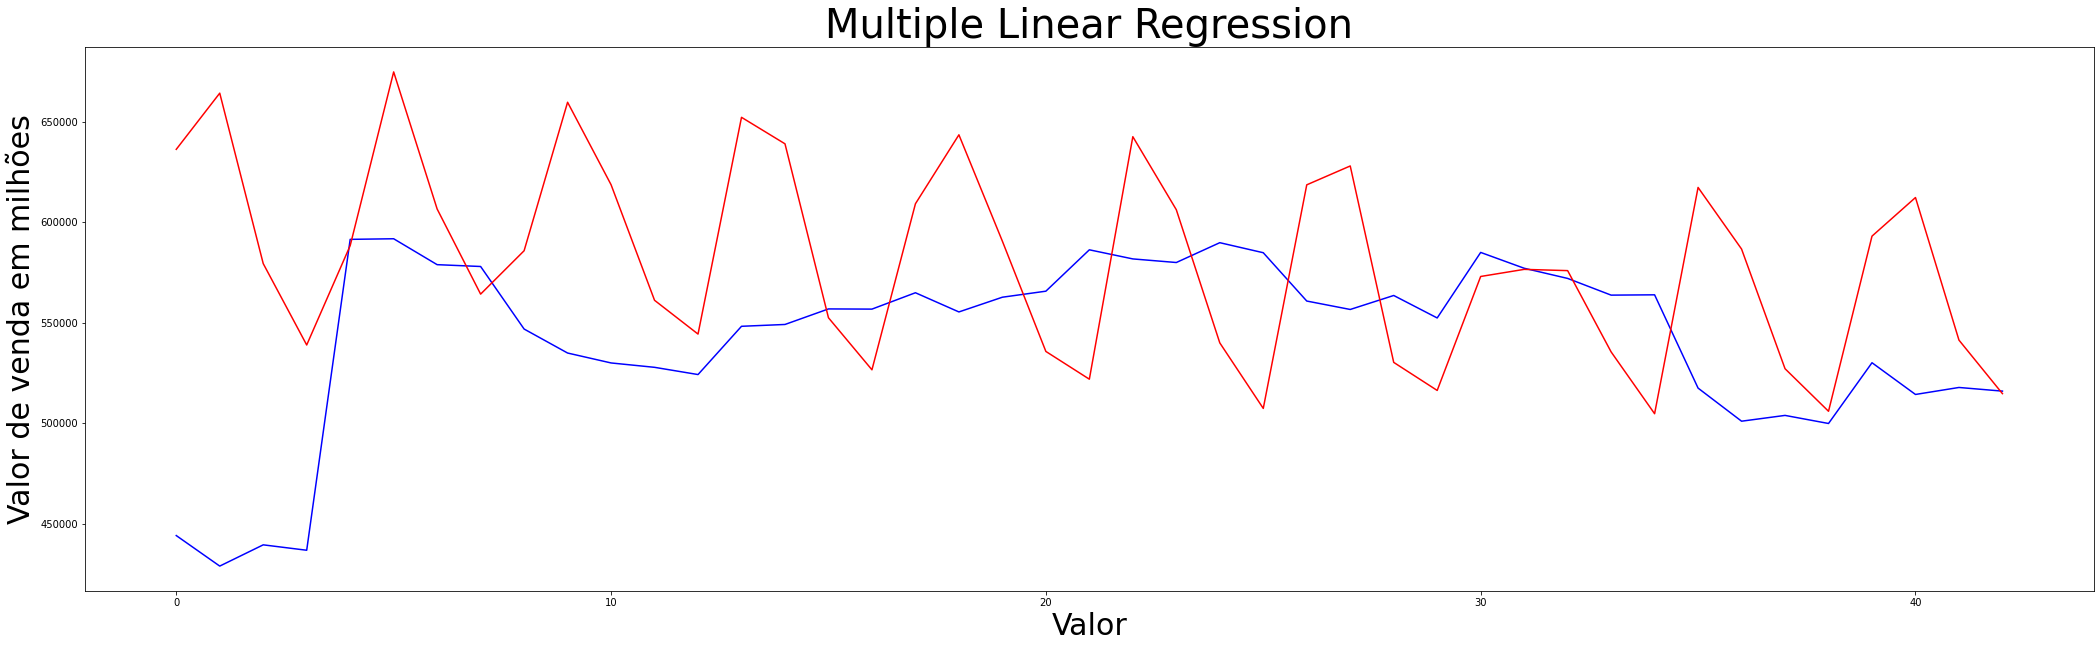

**************************************************
Resultados Loja 43:
-2.5103874919426357 38860.50864389341 52704.881451227295


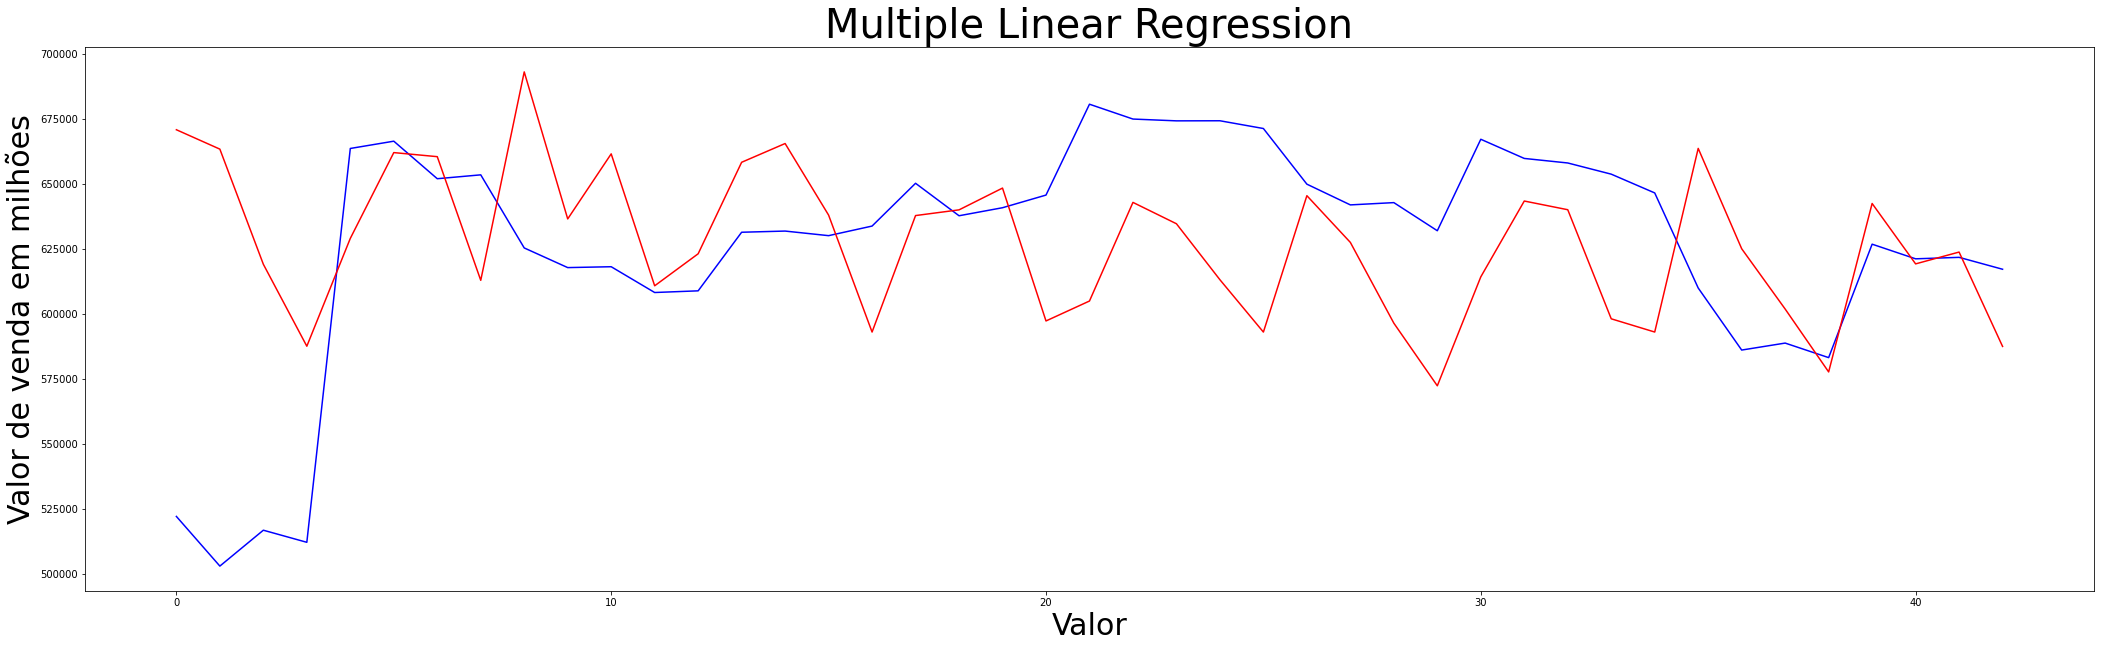

**************************************************
Resultados Loja 44:
-12.427000218497056 35757.186845779346 51122.21177268649


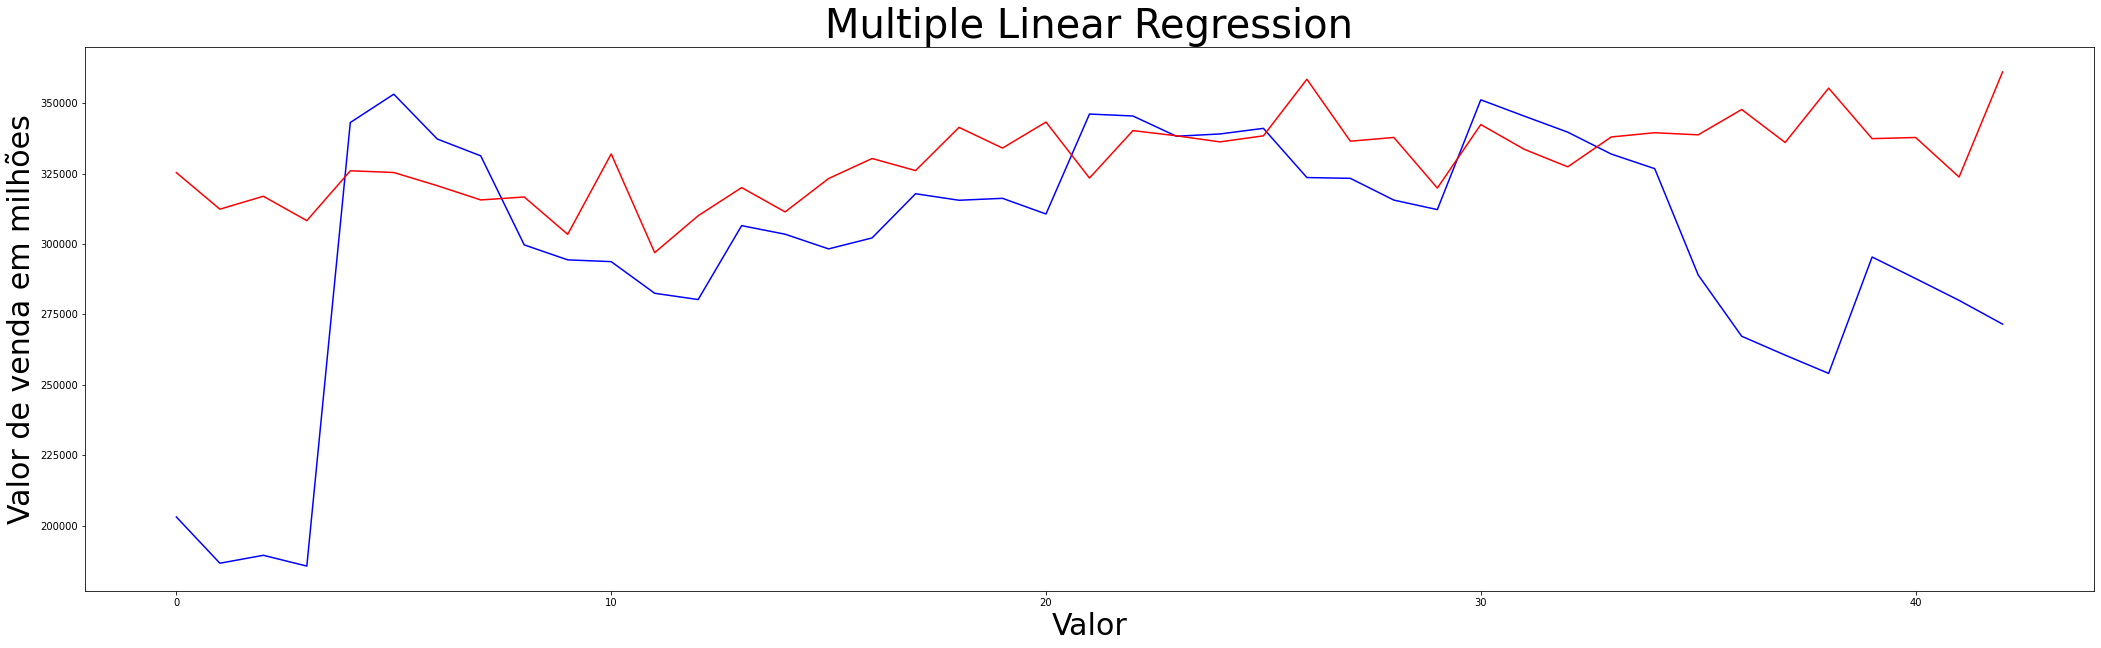

**************************************************
Resultados Loja 45:
0.3840038132974588 31229.311591353115 40513.88517315393


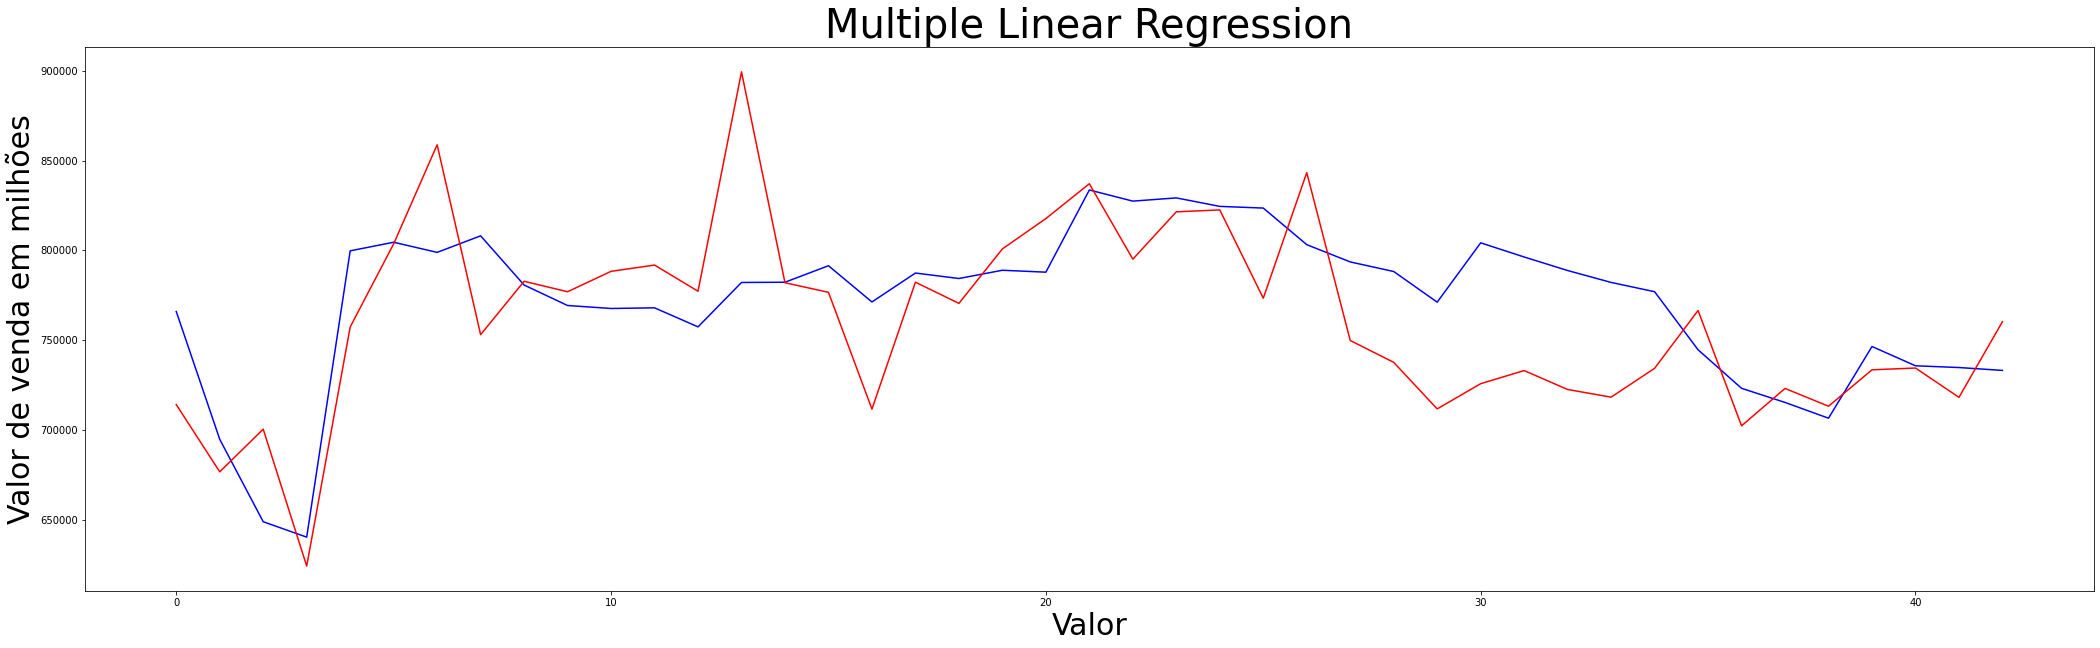

**************************************************


In [304]:
Xy_test = X_test
Xy_test["y"] = y_test

for i in range(1, 46):
  X_loja = Xy_test.where(Xy_test["Store_" + str(i)] == 1).dropna()
  y_loja = X_loja["y"]
  X_loja = X_loja.drop(["y"], axis=1)

  predictions_loja = mlr.predict(X_loja)

  print("Resultados Loja {}:".format(i))
  print(r2_score(y_loja, predictions_loja), mean_absolute_error(y_loja, predictions_loja), np.sqrt(mean_squared_error(y_loja, predictions_loja)))
  
  plt.figure(figsize = (36, 10)) 
  plt.plot(range(len(predictions_loja)), predictions_loja, 'b')
  plt.plot(range(len(predictions_loja)), y_loja, 'r')
  plt.title("Multiple Linear Regression", fontsize=40)
  plt.xlabel("Semanas", fontsize=30)
  plt.ylabel("Valor de venda em milhões", fontsize=30)

  plt.show()
  
  print(50*"*")


In [256]:
for i, feature in enumerate(mlr.feature_names_in_):
  print("Feature {}: {}".format(feature, mlr.coef_[i]))


TypeError: ignored